## Project_2: Drivers of HDB Resale Price and Prediction
- 02 Exploratory Data Analysis

#### Content
> * [Problem Statement](#problem_statement) 
> * [Data Cleaning](#data_cleaning)
> * [EDA](#eda)
> * [Preprocessing and Modeling](#preprocessing_and_modeling)
> * [Evaluation and Conceptual Understanding](#evaluation_and_conceptual_understanding)
> * [Conclusion and Recommendations](#conclusion_and_recommendations)

---
<a id='problem_statement'></a>
## Problem Statement

Over the years, Singapore has seen the puzzling rise of public housing in the resale market with million dollar price tags, supporting the theory that “decent gains” can still be acquired, especially for HDB flats bought at subsidised prices from the Government. What are the factors contributing to high upside potential for these units? 

Research Findings: Property value is affected by the confluence of macro and micro, demand and supply factors.  

<details><summary> (1) Demand-pull inflation caused by shifts in socio-demographic micro-trends. </summary>
- Many young couples are willing to pay a premium to acquire a resale flat to avoid delaying plans to start a family. 
- More millenials are also opting to remain single and aspire to move out of their nests before they are eligible to purchase a BTO, to alleviate the strain on relationships and their mental health. Covid-19 has likely accelerated the desire to move out for many millenials.
- In response to these socio-demographic trends, the government is rethinking the 35 year-old age requirement for single Singaporeans. could elevate the demand for resale flats even further. 
- Based on a study conducted by the Ministry of Finance, Singaporeans' education, employment, wage outcomes have improved over the generations. Many are gainfully employed, as reflected in the high proportion of Singapore citizens in employment and the low unemployment rate.
</details>
<br> 
<details><summary> (2) Demand-pull inflation in the private housing market. </summary>
- Historical data on private property housing has shown that while sales volume and prices usually dip during a crisis such as a high inflation, high interest rate environment, it has not been the case for the private housing market in Singapore. More wealthy individuals from China and Hong Kong are moving into the Singapore private property market to escape XJP's common prosperity doctrine. This will drive the prices of private condominiums even higher, making it less affordable for many middle income Singaporeans. Being priced out of the private housing market, this substantial group of consumers will turn to the next best alternative - spacious resale flats. Demand for resale flats is projected to increase even more, driving resale prices even higher. 
</details>
<br> 
<details><summary> (3) Material cost-push inflation due to supply-chain disruptions, increasing costs of production. </summary>
- Supply disruptions from the Russia-Ukraine war and ongoing supply chain issues caused prices of core construction materials in Singapore, such as copper, steel, concrete, cement and bricks, to inflate and material costs are projected to remain elevated in the next few quarters. 
- Costs of production has yet to be offset by increasing productivity as digitalisation of the construction workforce is not an overnight process.
</details>
<br>
<details><summary> (4) Material cost-push inflation compounded by high-interest rates. </summary>
- As FEDs are resolute in their fight against inflation, businesses suffer amidst hawkish quantitative tightening (contractionary monetary policy). High interest rates reduce the developer’s ability to service debt, as rising costs are incurred by the organization with no corresponding increase in revenues to offset while the construction is on-going.
- These costs are likely to be passed on to home-buyers. 
</details>
<br>
You are part of the Research & Consultancy team in PropNext. Propnext would like to ride on the wave and increase the number of high-value sales and purchase transactions intermediated by PropNext agents. PropNext is looking to develop an in-house mobile application that is able to predict the selling price of HDB resale flats. The application would help real estate agents detect and look out for units with huge upside potential, so as to rake in higher commissions per sale. The team has to identify high-yield features that contribute to the appreciation of units and report their findings to the software development team in 2 weeks' time. The software developers will then communicate the requirements to the software engineers who would then build the application with the embedded predictive function in collaboration with data scientists. 

Task: Use the Singapore public housing data to create a regression model that predicts the `resale_price` of Housing Development Board (HDB) flats in Singapore.

---
<a id='eda'></a>
## Exploratory Data Analysis (EDA)
- Extract insights from `hdb_train` for Feature Selection / Feature Engineering.
- Shed light on factors that  give rise to million dollar housing.
- Do not touch `hdb_test` becuase the data is supposed to be unseen.

*All libraries should be added here.* 

In [1]:
# Import correct modules using accurate aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import scipy.stats as stats
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from datetime import datetime

%matplotlib inline

In [2]:
# import hdb_train for further inspection
hdb_train = pd.read_pickle('../data/hdb_train.csv') 

In [3]:
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         150634 non-null  category      
 1   tranc_yearmonth            150634 non-null  datetime64[ns]
 2   town                       150634 non-null  category      
 3   flat_type                  150634 non-null  category      
 4   block                      150634 non-null  category      
 5   street_name                150634 non-null  category      
 6   storey_range               150634 non-null  category      
 7   floor_area_sqm             150634 non-null  float64       
 8   flat_model                 150634 non-null  category      
 9   lease_commence_date        150634 non-null  int64         
 10  resale_price               150634 non-null  float64       
 11  tranc_year                 150634 non-null  datetime

In [4]:
# There are 50 numeric features
hdb_train_numeric = hdb_train.select_dtypes(include = ['float64', 'int64'])
len(hdb_train_numeric.columns)

50

In [5]:
# There are 24 categorical (binary, nominal, ordinal) features
hdb_train_cat = hdb_train.select_dtypes(include = 'category')
len(hdb_train_cat.columns)

24

In [6]:
# There are 3 datetime64 features
hdb_train_dt = hdb_train.select_dtypes(include = 'datetime64')
len(hdb_train_dt.columns)

3

---
### EDA #1 : Numerical Variables (Float64, Int64)

*Check for outliers for the remaining numeric variables using boxplots.*

In [7]:
# IQR
Q1 = hdb_train_numeric.quantile(0.25) 
Q3 = hdb_train_numeric.quantile(0.75) 
IQR = Q3 - Q1

In [8]:
# Overview of the counts of outliers for each column - 50 numeric variables in train set
((hdb_train_numeric < (Q1 - 1.5 * IQR)) | (hdb_train_numeric > (Q3 + 1.5 * IQR))).sum()

floor_area_sqm                 465
lease_commence_date              0
resale_price                  5220
mid_storey                    4173
lower                         4173
upper                         4173
mid                           4173
floor_area_sqft                465
hdb_age                          0
max_floor_lvl                20165
year_completed                 124
total_dwelling_units          8935
1room_sold                      82
2room_sold                    6310
3room_sold                   10206
4room_sold                    3335
5room_sold                     996
exec_sold                    26020
multigen_sold                   77
studio_apartment_sold         1408
1room_rental                   302
2room_rental                  1864
3room_rental                  3829
other_room_rental               32
latitude                         0
longitude                        0
mall_nearest_distance         3079
mall_within_500m              3556
mall_within_1km     

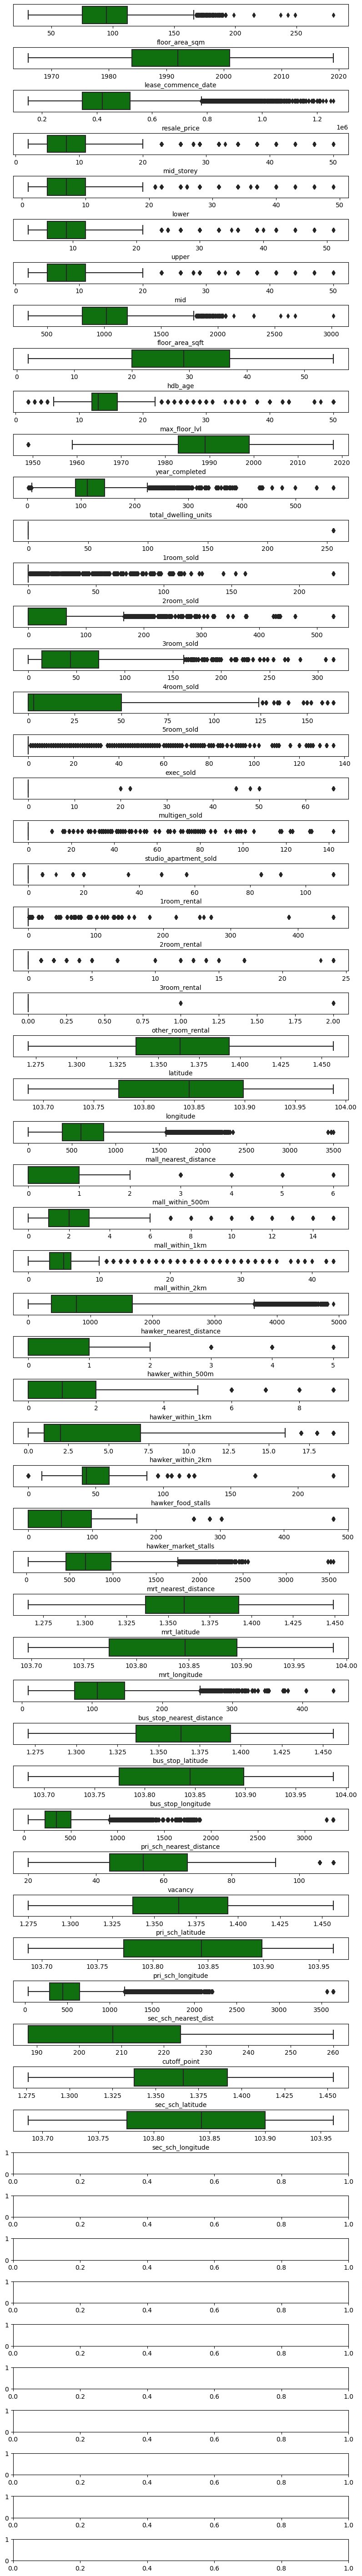

In [9]:
# Visualise outliers for numeric data using boxplots
fig, axs = plt.subplots(60, 1, figsize=(5, 75), sharex=False, sharey=False)
plt.subplots_adjust(left=0.025, bottom=1.5, right=1.5, top=2.25, wspace=1.0, hspace=1.0)
col = hdb_train_numeric.columns.values[0:] 
i = 1

for k in range(0,len(col)):
    axi = plt.subplot(60, 1, i)
    sns.boxplot(x = hdb_train_numeric.iloc[:, k], orient='h', color='green')
    axi.set_yticks([])
    i+=1

Comments: Zoom in on outliers in the target variable (resale_price) and the strongest numeric predictors (to be identified using heatmap). 

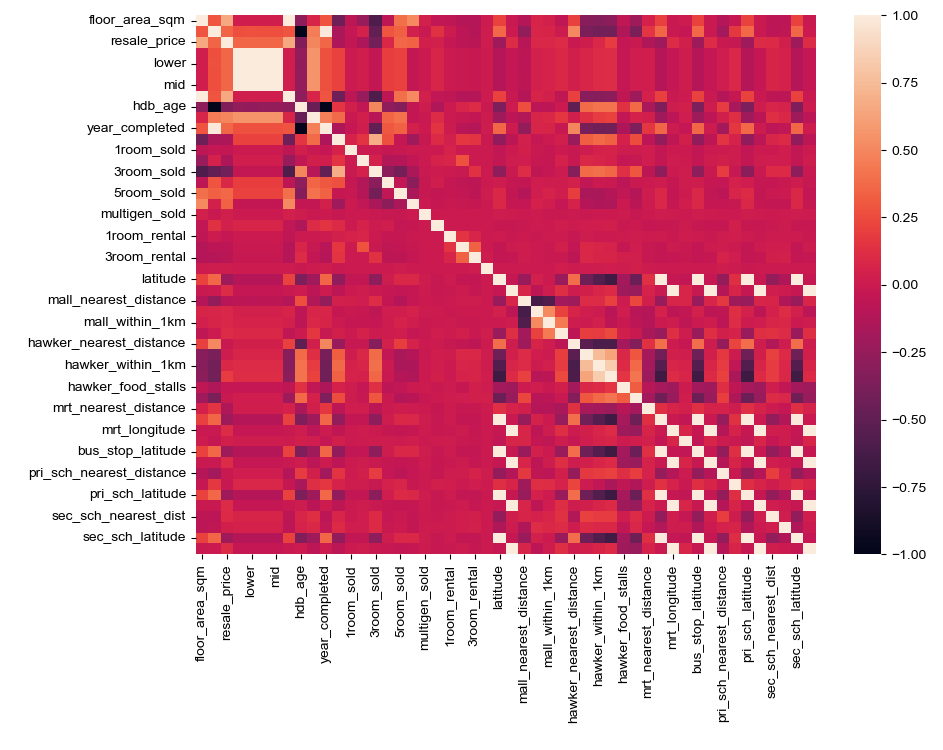

In [10]:
# Correlations between explanatory features (numeric) and the target variable (resale_price) 
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(hdb_train.corr(numeric_only = True), ax=ax)
sns. set(font_scale=0.25) 
plt.show()

In [11]:
# Filter numeric features by correlation
abs(hdb_train.corr(numeric_only = True)['resale_price']).sort_values(ascending=False)

resale_price                 1.000000
floor_area_sqm               0.654120
floor_area_sqft              0.654120
max_floor_lvl                0.495650
3room_sold                   0.410368
5room_sold                   0.359434
year_completed               0.353698
upper                        0.353552
mid_storey                   0.353213
mid                          0.353213
lower                        0.352466
lease_commence_date          0.350337
hdb_age                      0.350337
exec_sold                    0.337500
sec_sch_latitude             0.216303
latitude                     0.216153
bus_stop_latitude            0.215760
mrt_latitude                 0.214939
pri_sch_latitude             0.214707
hawker_within_2km            0.183168
2room_sold                   0.145287
total_dwelling_units         0.140725
mrt_nearest_distance         0.128222
sec_sch_longitude            0.108911
mall_within_2km              0.108648
pri_sch_longitude            0.106681
longitude   

Comment: The strongest numeric predictors of the target variable is 'floor_area_sqm' and 'floor_area_sqft' as expected. 

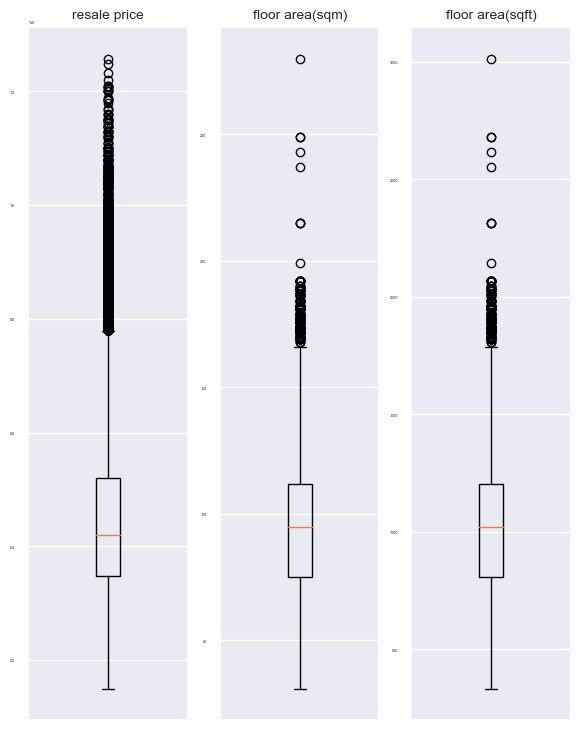

In [12]:
# Boxplot for target variable `resale_price`, explanatory variables 'floor_area_sqm' and 'floor_area_sqft'

# establish figure size
plt.figure(figsize=[7, 9])

# subplot #1
# plt.subplot(1, 3, 1) means we have 1 row, 3 columns, and are referencing plot 1.
ax1 = plt.subplot(1,3,1) 
ax1.set_title('resale price', fontsize=10) 
ax1.boxplot(hdb_train['resale_price'])
ax1.set_xticks([])

# subplot #2           
# plt.subplot(1, 3, 2) means we have 1 row, 3 columns, and are referencing plot 2.
ax2 = plt.subplot(1,3,2) 
ax2.set_title('floor area(sqm)', fontsize=10)
ax2.boxplot(hdb_train['floor_area_sqm']) 
ax2.set_xticks([])

# subplot #3
# plt.subplot(1, 3, 3) means we have 1 row, 3 columns, and are referencing plot 3.
ax3 = plt.subplot(1,3,3) 
ax3.set_title('floor area(sqft)', fontsize=10) 
ax3.boxplot(hdb_train['floor_area_sqft']) 
ax3.set_xticks([]);

Comments: Do not drop outliers for 'resale_price', 'floor_area_sqm', and 'floor_area_sqft' - but take note of them for further exploration if time permits. They might be able to explain the unusual rise of million-dollar HDB resale flats.
* 4916 outliers for `resale_price`
* 464 outliers for `floor_area_sqm` 
* 464 outliers for `floor_area_sqft`

### 3.1.1 Resale_Price
Check for normality.

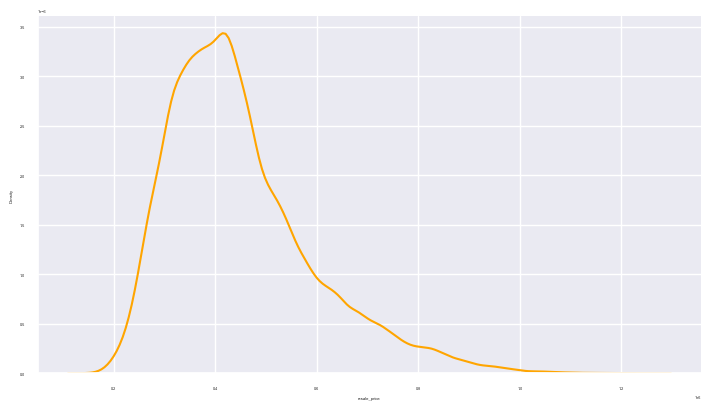

In [13]:
# Change the size of the figure
# fig, ax = plt.subplots(figsize=(10,10))

# Check for Normality using Histogram or Density Plot
sns.displot(data = hdb_train['resale_price'], kind='kde', 
            color='orange', height=4, aspect=1.75)
 
# visualizing plot using matplotlib.pyplot library
plt.show();

Comment: Target variable `resale_price` is not normally distributed. For linear regression, it is not necessary for the response variable or features to be normally distributed, especially if you are just building a ML model for predictive purposes. 

### 3.1.2 Floor_Area_Sqft
How does `floor_area_sqft` relate to `resale_price`?

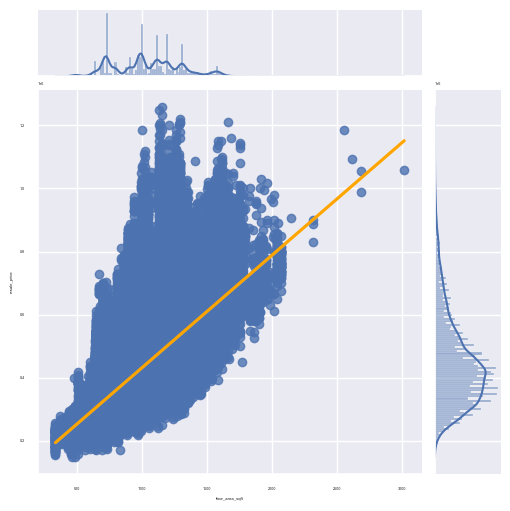

In [14]:
# Create Scatterplot with Regression Line
sns.jointplot(x="floor_area_sqft", y="resale_price", data=hdb_train, kind='reg', line_kws={"color": "orange"}, height=5)
plt.show()

Comment: Regression line corroborates results inferred from correlation matrix. `floor_area_sqft` is a strong predictor of target variable `resale_price`, hence the feature should be included as a predictor in the ML model. More specifically, the larger the `floor_area_sqft`, the higher the `resale_price` (positive correlation). 

### 3.1.3 Max_Floor_Lvl
How does `max_floor_sqft` relate to `resale_price`?

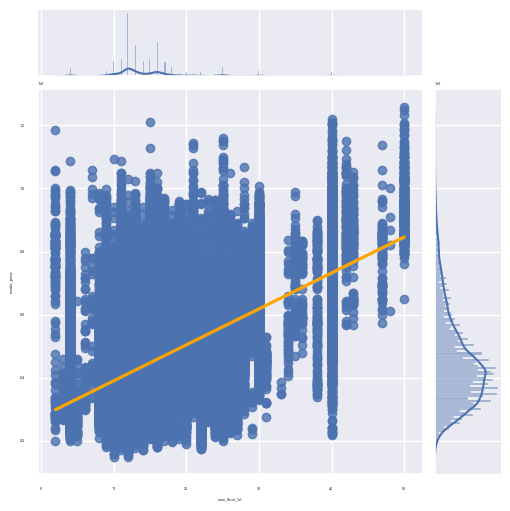

In [15]:
# Create Scatterplot with Regression Line
sns.jointplot(x="max_floor_lvl", y="resale_price", data=hdb_train, kind='reg', line_kws={"color": "orange"}, height=5)
plt.show()

Comment: Regression line corroborates inferences derived from correlation matrix. `max_floor_lvl` is a moderately strong predictor of target variable `resale_price`. More specifically, higher the `max_floor_lvl`, the higher the `resale_price` (positive correlation). 

### 3.1.4 Total Dwelling Units
- Inclusive of `Room_Sold` and `Room_Rental`.


In [16]:
hdb_train['tranc_year'].value_counts()

2020-01-01    18904
2019-01-01    18019
2018-01-01    17536
2017-01-01    16674
2012-01-01    16180
2016-01-01    15624
2015-01-01    14311
2013-01-01    13085
2014-01-01    12985
2021-01-01     7316
Name: tranc_year, dtype: int64

In [17]:
total_dwelling_units_df = hdb_train.groupby(hdb_train['tranc_year'])['1room_sold', '2room_sold', '3room_sold', '4room_sold', 
                                           '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', 
                                           '1room_rental', '2room_rental', '3room_rental', 'other_room_rental', 'total_dwelling_units'].sum()

print(total_dwelling_units_df)
# note that the aggregated sum per row adds up to total_dwelling_units per year

            1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  \
tranc_year                                                               
2012-01-01        2805       16414      672683      751198      422350   
2013-01-01        1275       17139      587951      617225      317593   
2014-01-01        4845       15805      607802      621496      313184   
2015-01-01        1785       14575      593149      700563      371828   
2016-01-01        1020       18170      612346      795029      411210   
2017-01-01        2040       26626      613236      859468      450818   
2018-01-01        1785       37171      639085      888005      479057   
2019-01-01        2295       51535      671180      915931      464201   
2020-01-01        2040       54365      665028      993589      519082   
2021-01-01        1020       16638      245310      401846      212329   

            exec_sold  multigen_sold  studio_apartment_sold  1room_rental  \
tranc_year                        

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gn/T/ipykernel_29121/1777688239.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_dwelling_units_df = hdb_train.groupby(hdb_train['tranc_year'])['1room_sold', '2room_sold', '3room_sold', '4room_sold',


Comment: From the dataframe above, we can see that the `total_dwelling_units` is the aggregation of `1room_sold`, `2room_sold`, `3room_sold`, `4room_sold`, `5room_sold`, `exec_sold`, `multigen_sold`, `studio_apartment_sold`, `1room_rental`, `2room_rental`, `3room_rental`, `other_room_rental`.

In [18]:
# Compute percentages of each unit type over total dwelling units

for i in range(0,len(total_dwelling_units_df)):
    # 1room_sold percentage
    total_dwelling_units_df.iloc[i,0] = (total_dwelling_units_df.iloc[i,0] / total_dwelling_units_df.iloc[i,12])*100
    # 2room_sold percentage
    total_dwelling_units_df.iloc[i,1] = (total_dwelling_units_df.iloc[i,1] / total_dwelling_units_df.iloc[i,12])*100
    # 3room_sold percentage
    total_dwelling_units_df.iloc[i,2] = (total_dwelling_units_df.iloc[i,2] / total_dwelling_units_df.iloc[i,12])*100
    # 4room_sold percentage
    total_dwelling_units_df.iloc[i,3] = (total_dwelling_units_df.iloc[i,3] / total_dwelling_units_df.iloc[i,12])*100
    # 5room_sold percentage
    total_dwelling_units_df.iloc[i,4] = (total_dwelling_units_df.iloc[i,4] / total_dwelling_units_df.iloc[i,12])*100
    # exec_sold percentage
    total_dwelling_units_df.iloc[i,5] = (total_dwelling_units_df.iloc[i,5] / total_dwelling_units_df.iloc[i,12])*100
    # multigen_sold percentage
    total_dwelling_units_df.iloc[i,6] = (total_dwelling_units_df.iloc[i,6] / total_dwelling_units_df.iloc[i,12])*100
    # studio_apartment_sold percentage
    total_dwelling_units_df.iloc[i,7] = (total_dwelling_units_df.iloc[i,7] / total_dwelling_units_df.iloc[i,12])*100
    # 1room_rental percentage
    total_dwelling_units_df.iloc[i,8] = (total_dwelling_units_df.iloc[i,8] / total_dwelling_units_df.iloc[i,12])*100
    # 2room_rental percentage
    total_dwelling_units_df.iloc[i,9] = (total_dwelling_units_df.iloc[i,9] / total_dwelling_units_df.iloc[i,12])*100
    # 3room_rental percentage
    total_dwelling_units_df.iloc[i,10] = (total_dwelling_units_df.iloc[i,10] / total_dwelling_units_df.iloc[i,12])*100
    # other_room_rental percentage
    total_dwelling_units_df.iloc[i,11] = (total_dwelling_units_df.iloc[i,11] / total_dwelling_units_df.iloc[i,12])*100
    # total_dwelling_units percentage
    total_dwelling_units_df.iloc[i,12] = (total_dwelling_units_df.iloc[i,12] / total_dwelling_units_df.iloc[i,12])*100

In [19]:
total_dwelling_units_df

1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  \
tranc_year                                                               
2012-01-01    0.140727    0.823493   33.748625   37.687737   21.189374   
2013-01-01    0.077879    1.046878   35.912993   37.701096   19.399091   
2014-01-01    0.294390    0.960338   36.931073   37.763144   19.029587   
2015-01-01    0.100453    0.820227   33.380230   39.425093   20.925104   
2016-01-01    0.052558    0.936261   31.552874   40.966137   21.188768   
2017-01-01    0.098486    1.285439   29.605548   41.493032   21.764401   
2018-01-01    0.081903    1.705546   29.323627   40.745015   21.980940   
2019-01-01    0.102786    2.308096   30.060109   41.021761   20.790149   
2020-01-01    0.085886    2.288817   27.998302   41.831029   21.853839   
2021-01-01    0.109802    1.791064   26.407376   43.258320   22.857004   

            exec_sold  multigen_sold  studio_apartment_sold  1room_rental  \
tranc_year                                                                  
2012-01-01   5.498551       0.021774               0.097531      0.056341   
2013-01-01   4.809505       0.024555               0.131570      0.047033   
2014-01-01   4.118974       0.011727               0.151297      0.056448   
2015-01-01   4.632609       0.009004               0.114466      0.023467   
2016-01-01   4.660179       0.017210               0.140774      0.055341   
2017-01-01   4.875746       0.010814               0.264754      0.056678   
2018-01-01   5.190509       0.034183               0.380009      0.059649   
2019-01-01   4.539247       0.031440               0.613760      0.060507   
2020-01-01   4.610895       0.012504               0.883025      0.040206   
2021-01-01   4.414470       0.012918               0.836540      0.053717   

            2room_rental  3room_rental  other_room_rental  \
tranc_year                                                  
2012-01-01      0.672632      0.063164           0.000050   
2013-01-01      0.780440      0.068778           0.000183   
2014-01-01      0.629066      0.053713           0.000243   
2015-01-01      0.518192      0.050874           0.000281   
2016-01-01      0.382697      0.047045           0.000155   
2017-01-01      0.504839      0.040070           0.000193   
2018-01-01      0.451772      0.046572           0.000275   
2019-01-01      0.433986      0.038114           0.000045   
2020-01-01      0.362026      0.032628           0.000842   
2021-01-01      0.216159      0.042198           0.000431   

            total_dwelling_units  
tranc_year                        
2012-01-01                   100  
2013-01-01                   100  
2014-01-01                   100  
2015-01-01                   100  
2016-01-01                   100  
2017-01-01                   100  
2018-01-01                   100  
2019-01-01                   100  
2020-01-01                   100  
2021-01-01                   100

In [20]:
total_dwelling_units_df.index[9]

Timestamp('2021-01-01 00:00:00')

In [21]:
# Range of rows
range(1, len(total_dwelling_units_df))

range(1, 10)

In [22]:
# Drop the column 'total_dwelling_units'
total_dwelling_units_df.drop('total_dwelling_units', axis=1, inplace=True)

In [23]:
# Visualise the shifts in percentage of 1room_sold, 2room_sold, 3room_sold, 4room_sold, 
# 5room_sold, exec_sold, multigen_sold, studio_apartment_sold 
# 1room_rental, 2room_rental, 3room_rental, other_room_rental
# over the last 10 years to see where demand lies and how the urban planning strategy has shifted with change in demographics

fig, axs = plt.subplots (5, 2, figsize=(50, 75), dpi=250, sharex=False, sharey=False)
i = 0 

for j in range(1, len(total_dwelling_units_df)+1):
    axj = plt.subplot(5, 2, j)
    axj.set_title(total_dwelling_units_df.index[i].year, fontsize=25)
    y = np.array(total_dwelling_units_df.iloc[i])
    mylabels = ['1room_sold', '2room_sold', '3room_sold', '4room_sold', 
                '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', 
                '1room_rental', '2room_rental', '3room_rental', 'other_room_rental']
    colors = ['#7285A5', 
              '#EC6B56',
              '#FFC154',
              '#47B39C', 
              '#FF7E00', 
              '#633EBB', 
              '#F2BC5E',
              '#7982B9', 
              '#A5C1DC', 
              '#E9F6FA', 
              '#ff8829', 
              '#004c4c']
    axj.pie(y, labels = mylabels, colors=colors, textprops={'fontsize': 14})
    i+=1

Comment: Pie Charts might not be the best way to visualise percentages of a whole. Try Waffle Charts, Tree Maps or Bubble Charts to see if the composition in  has shifted over the years.

In [24]:
from pywaffle import Waffle

In [25]:
total_dwelling_units_df.reset_index(inplace=True)

In [26]:
total_dwelling_units_df.columns

Index(['tranc_year', '1room_sold', '2room_sold', '3room_sold', '4room_sold',
       '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold',
       '1room_rental', '2room_rental', '3room_rental', 'other_room_rental'],
      dtype='object')

In [27]:
# Reformat datetime variable 'tranc_year' to yyyy 
total_dwelling_units_df['tranc_year'] = pd.to_datetime(total_dwelling_units_df['tranc_year'], format='%Y').apply(lambda x : x.strftime('%Y'))

In [28]:
total_dwelling_units_df.tail(3)               

tranc_year  1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  \
7       2019    0.102786    2.308096   30.060109   41.021761   20.790149   
8       2020    0.085886    2.288817   27.998302   41.831029   21.853839   
9       2021    0.109802    1.791064   26.407376   43.258320   22.857004   

   exec_sold  multigen_sold  studio_apartment_sold  1room_rental  \
7   4.539247       0.031440               0.613760      0.060507   
8   4.610895       0.012504               0.883025      0.040206   
9   4.414470       0.012918               0.836540      0.053717   

   2room_rental  3room_rental  other_room_rental  
7      0.433986      0.038114           0.000045  
8      0.362026      0.032628           0.000842  
9      0.216159      0.042198           0.000431

In [29]:
# Isolate data for year 2012 (earliest) and 2021 (latest)
total_dwelling_2012 = total_dwelling_units_df.iloc[[0]]
total_dwelling_2021 = total_dwelling_units_df.iloc[[9]]


Create dataframe for Waffle Chart, Tree Map or Bubble Chart per year.
- Compare composition of total dwelling units in 2012 and 2021. Plot breakdown for year 2012 first.


In [30]:
# Transpose total_dwelling_2012
df_2012 = total_dwelling_2012.transpose()


In [31]:
# Reset index to create column for Unit_Type
df_2012.reset_index(inplace=True)


In [32]:
# Create new column and assign value 2012 to all rows
df_2012['Year'] = 2012


In [33]:
# Drop the first row
df_2012.drop(index=df_2012.index[0],
             axis=0,
             inplace=True)
df_2012


index          0  Year
1              1room_sold   0.140727  2012
2              2room_sold   0.823493  2012
3              3room_sold  33.748625  2012
4              4room_sold  37.687737  2012
5              5room_sold  21.189374  2012
6               exec_sold   5.498551  2012
7           multigen_sold   0.021774  2012
8   studio_apartment_sold   0.097531  2012
9            1room_rental   0.056341  2012
10           2room_rental   0.672632  2012
11           3room_rental   0.063164  2012
12      other_room_rental    0.00005  2012

In [34]:
# Rename column 'index' to 'Unit'
df_2012.rename(columns={'index':'Unit'}, inplace=True)

In [35]:
# Rename column '0' to 'Percent'
df_2012.rename(columns={0:'Percent'}, inplace=True)

In [36]:
# Create new column 'Value' and insert values for the percentages
df_2012['Value'] = (df_2012['Percent']/100) * 1993216 
df_2012

Unit    Percent  Year     Value
1              1room_sold   0.140727  2012    2805.0
2              2room_sold   0.823493  2012   16414.0
3              3room_sold  33.748625  2012  672683.0
4              4room_sold  37.687737  2012  751198.0
5              5room_sold  21.189374  2012  422350.0
6               exec_sold   5.498551  2012  109598.0
7           multigen_sold   0.021774  2012     434.0
8   studio_apartment_sold   0.097531  2012    1944.0
9            1room_rental   0.056341  2012    1123.0
10           2room_rental   0.672632  2012   13407.0
11           3room_rental   0.063164  2012    1259.0
12      other_room_rental    0.00005  2012       1.0

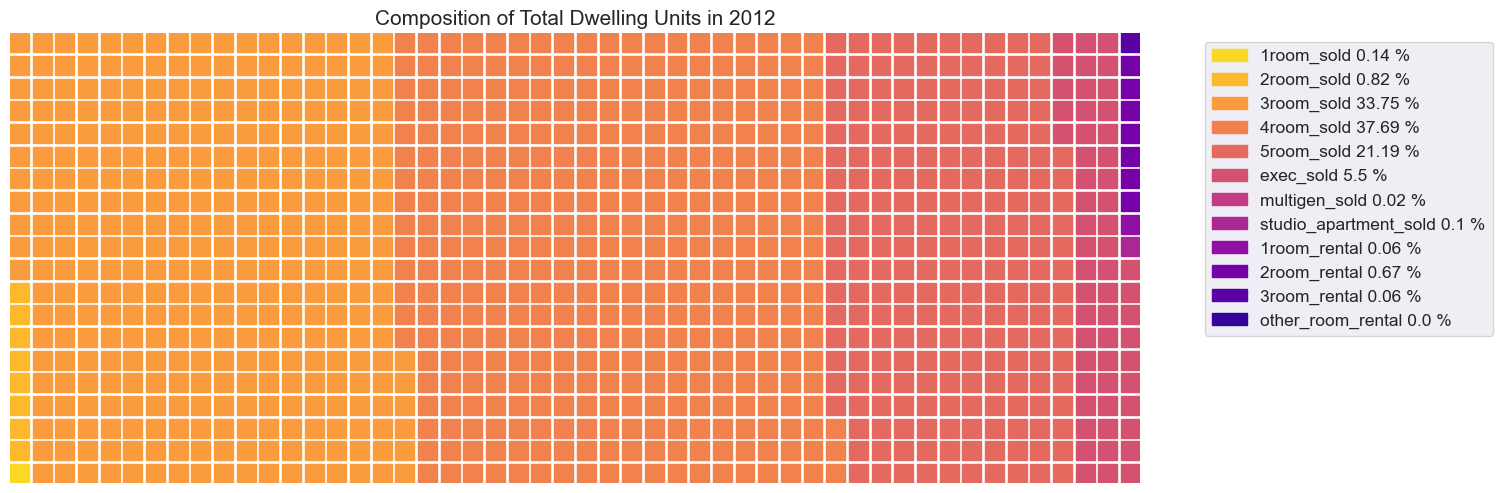

In [37]:
# Create a list of units
list_unit = ['1room_sold', '2room_sold', '3room_sold', '4room_sold',
             '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold',
             '1room_rental', '2room_rental', '3room_rental', 'other_room_rental']

# Get a color list, palette name can be changed
pal_ = list(sns.color_palette(palette='plasma_r',
                              n_colors=len(list_unit)).as_hex())

# Create a list of percentages for labeling
label_per = [str(round(i*100/sum(df_2012.Value),2))+' %' for i in df_2012.Value]


plt.rc('legend', fontsize = 12.5)


fig = plt.figure(FigureClass=Waffle, 
                 rows=20, columns=50,
                 values=df_2012.Percent, 
                 colors=pal_,
                 labels=[i+' '+j for i,j in zip(df_2012.Unit, label_per)],
                 figsize = (15,6),
                 legend={'loc':'upper right',
                         'bbox_to_anchor': (1.32, 1),})


plt.tight_layout()
plt.title('Composition of Total Dwelling Units in 2012', fontsize = 15)
plt.show()


Create dataframe for Waffle Chart, Tree Map and Bubble Chart per year.
- Compare composition of total dwelling units in 2012 and 2021. Plot breakdown for 2021 next.

In [38]:
# Transpose total_dwelling_2021
df_2021 = total_dwelling_2021.transpose()

In [39]:
# Reset index to create column for Unit_Type
df_2021.reset_index(inplace=True)

In [40]:
# Create new column and assign value 2012 to all rows
df_2021['Year'] = 2021

In [41]:
# Drop the first row
df_2021.drop(index=df_2021.index[0],
             axis=0,
             inplace=True)
df_2021

index          9  Year
1              1room_sold   0.109802  2021
2              2room_sold   1.791064  2021
3              3room_sold  26.407376  2021
4              4room_sold   43.25832  2021
5              5room_sold  22.857004  2021
6               exec_sold    4.41447  2021
7           multigen_sold   0.012918  2021
8   studio_apartment_sold    0.83654  2021
9            1room_rental   0.053717  2021
10           2room_rental   0.216159  2021
11           3room_rental   0.042198  2021
12      other_room_rental   0.000431  2021

In [42]:
# Rename column 'index' to 'Unit'
df_2021.rename(columns={'index':'Unit'}, inplace=True)

In [43]:
# Rename column '9' to 'Percent'
df_2021.rename(columns={9:'Percent'}, inplace=True)

In [44]:
# Create new column 'Value' and insert values for the percentages
df_2021['Value'] = (df_2021['Percent']/100) * 928945 
df_2021

Unit    Percent  Year     Value
1              1room_sold   0.109802  2021    1020.0
2              2room_sold   1.791064  2021   16638.0
3              3room_sold  26.407376  2021  245310.0
4              4room_sold   43.25832  2021  401846.0
5              5room_sold  22.857004  2021  212329.0
6               exec_sold    4.41447  2021   41008.0
7           multigen_sold   0.012918  2021     120.0
8   studio_apartment_sold    0.83654  2021    7771.0
9            1room_rental   0.053717  2021     499.0
10           2room_rental   0.216159  2021    2008.0
11           3room_rental   0.042198  2021     392.0
12      other_room_rental   0.000431  2021       4.0

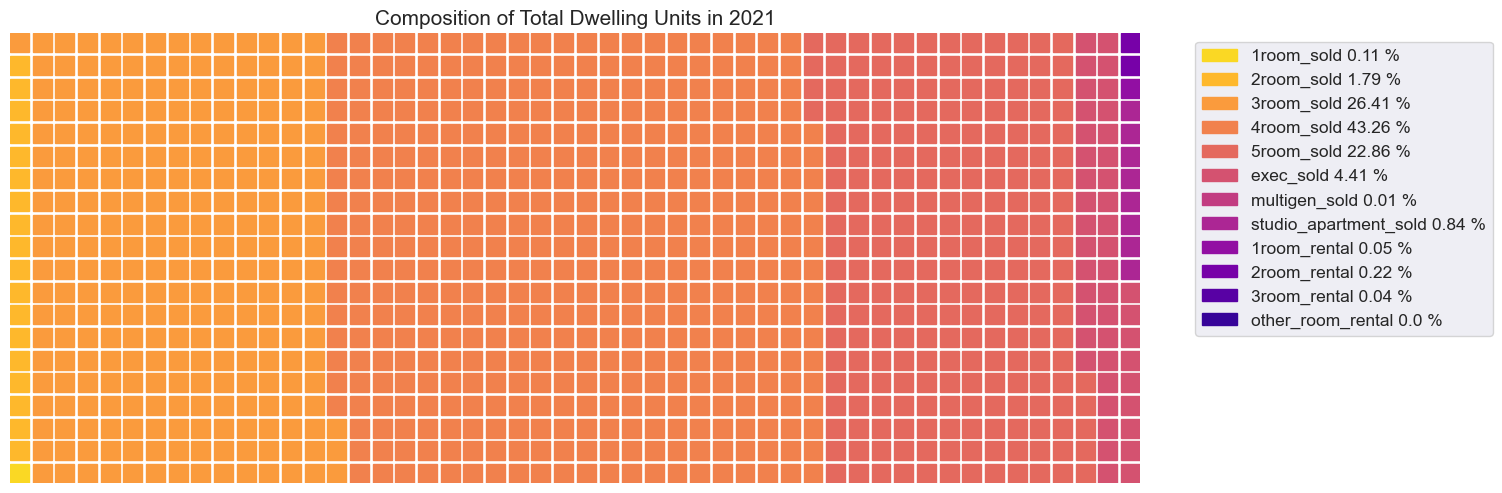

In [45]:
# Create a list of units
list_unit = ['1room_sold', '2room_sold', '3room_sold', '4room_sold',
             '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold',
             '1room_rental', '2room_rental', '3room_rental', 'other_room_rental']

# Get a color list, palette name can be changed
pal_ = list(sns.color_palette(palette='plasma_r',
                              n_colors=len(list_unit)).as_hex())

# Create a list of percentages for labeling
label_per = [str(round(i*100/sum(df_2021.Value),2))+' %' for i in df_2021.Value]


plt.rc('legend', fontsize = 12.5)


fig = plt.figure(FigureClass=Waffle, 
                 rows=20, columns=50,
                 values=df_2021.Percent, 
                 colors=pal_,
                 labels=[i+' '+j for i,j in zip(df_2021.Unit, label_per)],
                 figsize = (15,6),
                 legend={'loc':'upper right',
                         'bbox_to_anchor': (1.32, 1),})


plt.tight_layout()
plt.title('Composition of Total Dwelling Units in 2021', fontsize = 15)
plt.show()

Comment: There seems to be no change in composition of total dwelling units over 10 years. Ratio of units sold to units rented remained more or less the same. 

### 3.1.5 Room_Sold
How does `room_sold` relate to `resale_price`?
- Inclusive of `2room_sold`, `3room_sold`, `4room_sold`, `5room_sold`, `exec_sold`, `multigen_sold`, `studio_apartment_sold`.
- Treat it as a categorical variable.

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gn/T/ipykernel_29121/3494156956.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)


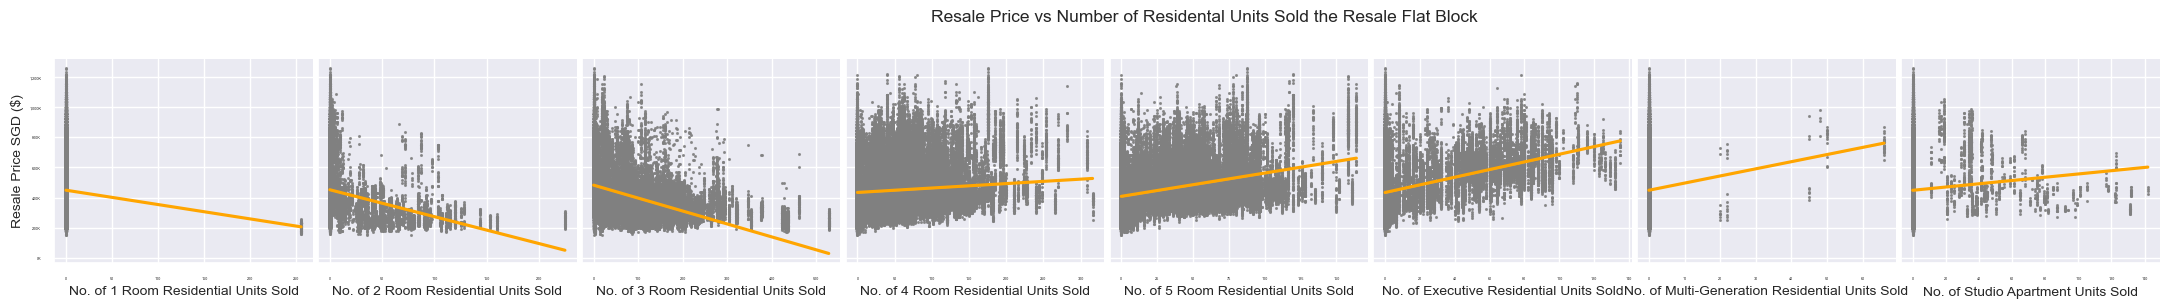

In [46]:
# Scatterplot for resale price against the number of rental residential units in the resale flat block

p=sns.pairplot(hdb_train, x_vars=["1room_sold", "2room_sold", "3room_sold", 
                                  "4room_sold", "5room_sold", "exec_sold", 
                                  "multigen_sold", "studio_apartment_sold"], 
               y_vars=["resale_price"], height=3, aspect=1, kind="reg", 
               plot_kws={'ci':True, 'ci':25, 'color':'orange', 'scatter_kws':{'color':'grey', 's': 1.5}})

axes=p.axes

ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('No. of 1 Room Residential Units Sold', size=10), 
axes[0,1].set_xlabel('No. of 2 Room Residential Units Sold', size=10)
axes[0,2].set_xlabel('No. of 3 Room Residential Units Sold', size=10), 
axes[0,3].set_xlabel('No. of 4 Room Residential Units Sold', size=10)
axes[0,4].set_xlabel('No. of 5 Room Residential Units Sold', size=10)
axes[0,5].set_xlabel('No. of Executive Residential Units Sold', size=10)
axes[0,6].set_xlabel('No. of Multi-Generation Residential Units Sold', size=10)
axes[0,7].set_xlabel('No. of Studio Apartment Units Sold', size=10)

plt.suptitle('Resale Price vs Number of Residental Units Sold the Resale Flat Block', size=12.5, ha='center')
plt.tight_layout(pad=1.25, w_pad=1.25, rect=[0, 0, 0.9, 0.9])
plt.show();

Comment: A higher number of smaller units sold within the project drives the resale price of units within the project down (1room, 2room, 3room). On the other hand, the higher the number of larger units sold within the project, the more elevated the resale price of the units within the project. 

### 3.1.6 Room_Rental
How does `room_rental` relate to `resale_price`?
- Inclusive of `1room_rental`, `2room_rental`, `3room_rental`, `other_room_rental`.
- Treat it as a categorical variable.

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gn/T/ipykernel_29121/951896995.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)


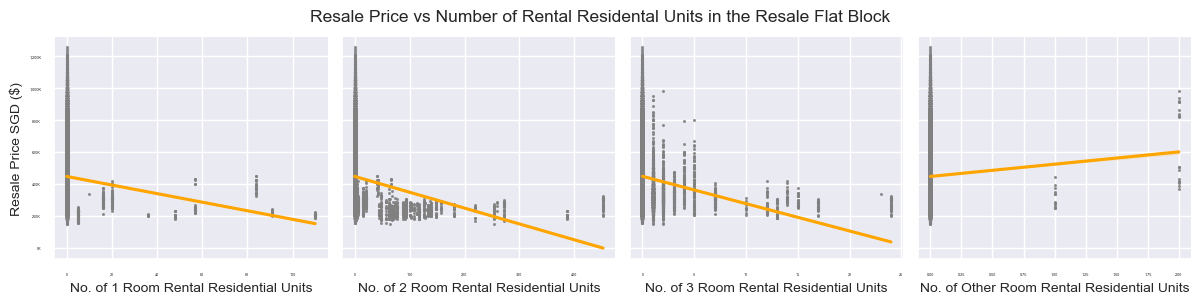

In [47]:
# Scatterplot for resale price against the number of rental residential units in the resale flat block

p=sns.pairplot(hdb_train, x_vars=["1room_rental", "2room_rental", "3room_rental", "other_room_rental"], 
               y_vars=["resale_price"], height=3, aspect=1, kind="reg", 
               plot_kws={'ci':True, 'ci':25, 'color':'orange', 'scatter_kws':{'color':'grey', 's': 1.5}})

axes=p.axes

ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('No. of 1 Room Rental Residential Units', size=10), 
axes[0,1].set_xlabel('No. of 2 Room Rental Residential Units', size=10)
axes[0,2].set_xlabel('No. of 3 Room Rental Residential Units', size=10), 
axes[0,3].set_xlabel('No. of Other Room Rental Residential Units', size=10)

plt.suptitle('Resale Price vs Number of Rental Residental Units in the Resale Flat Block', size=12.5, ha='center')
plt.tight_layout(pad=2.25, w_pad=3.5, rect=[0, 0, 1, 1])
plt.show();

Comment: Rental units are for Singaporeans who are not able to afford ownership of even the smallest flat. As expected, the larger the number of rental units in the development, the lower the price of the units. The last plot is interesting it is a stark constrast to the expected trend - to be further explored if time permits. 

### 3.1.7 Distance from Amenities
Which amenities matter?
- Inclusive of `mall_nearest_distance`, `hawker_nearest_distance`, `mrt_nearest_distance`, `bus_stop_nearest_distance`, `pri_sch_nearest_distance`, `sec_sch_nearest_distance`.

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gn/T/ipykernel_29121/547994260.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)


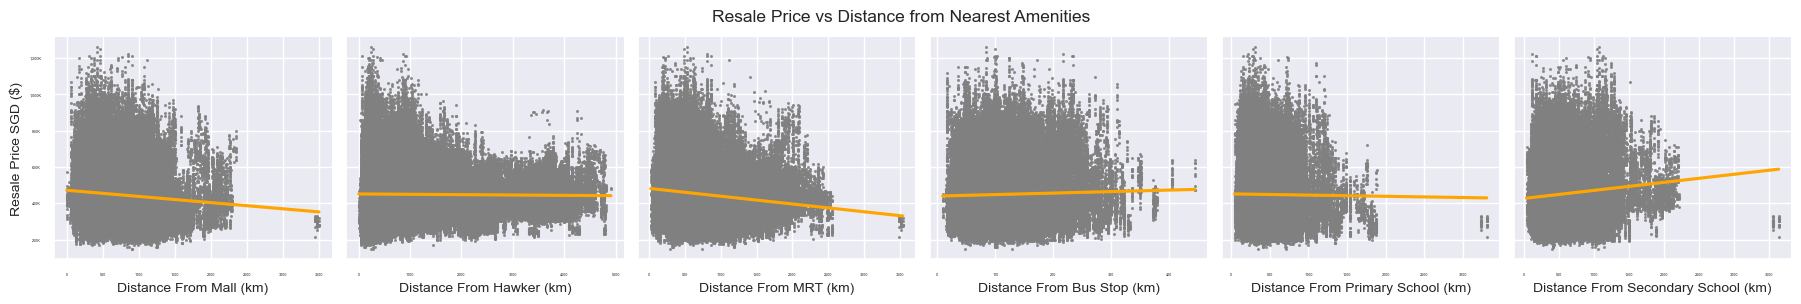

In [48]:
# Scatterplot for resale price against nearest distance from each amenity

p=sns.pairplot(hdb_train, x_vars=["mall_nearest_distance", "hawker_nearest_distance", 
                                  "mrt_nearest_distance", "bus_stop_nearest_distance", 
                                  "pri_sch_nearest_distance", "sec_sch_nearest_dist"], 
               y_vars=["resale_price"], height=3, aspect=1, kind="reg", 
               plot_kws={'ci':True, 'ci':25, 'color':'orange', 'scatter_kws':{'color':'grey', 's': 1.5}})

axes=p.axes
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Distance From Mall (km)', size=10), 
axes[0,1].set_xlabel('Distance From Hawker (km)', size=10)
axes[0,2].set_xlabel('Distance From MRT (km)', size=10), 
axes[0,3].set_xlabel('Distance From Bus Stop (km)', size=10)
axes[0,4].set_xlabel('Distance From Primary School (km)', size=10), 
axes[0,5].set_xlabel('Distance From Secondary School (km)', size=10)

plt.suptitle('Resale Price vs Distance from Nearest Amenities', size=12.5, ha='center')
plt.tight_layout(pad=2.25, w_pad=3.5, rect=[0, 0, 1, 1])
plt.show();

Comments: 
- As expected, the further the flat from amenities such as the mall, mrt, and primary school, the lower the resale price. 
- The distance from amenities such as the hawker does not have much of an impact on resale price.
- Interestingly, the further the flat from amenities such as bus stop and secondary school, the higher the resale price - to be further explored if time permits.

In [49]:
# Barplot for Average Distance from Mall (km) per Planning Area
mall_region = hdb_train.groupby(hdb_train['planning_area'])[['mall_nearest_distance']].mean().reset_index()

In [50]:
mall_region 

planning_area  mall_nearest_distance
0                Ang Mo Kio             777.659037
1                     Bedok            1028.179889
2                    Bishan             757.913119
3               Bukit Batok             908.231966
4               Bukit Merah             746.824851
5             Bukit Panjang             471.696884
6               Bukit Timah             830.103148
7                    Changi            3466.645561
8             Choa Chu Kang             381.738728
9                  Clementi             494.244356
10            Downtown Core             244.324579
11                  Geylang             921.389314
12                  Hougang             518.574356
13              Jurong East            1112.222723
14              Jurong West             618.025848
15                  Kallang             867.221072
16            Marine Parade             824.736442
17                   Novena            1044.022053
18                   Outram             307.052459
19                Pasir Ris             589.185428
20                  Punggol             473.829418
21               Queenstown             671.144606
22                   Rochor             290.201821
23                Sembawang             561.843144
24                 Sengkang             484.655924
25                Serangoon             641.519507
26                 Tampines             735.495079
27                  Tanglin            1546.477515
28                Toa Payoh             778.025448
29  Western Water Catchment             395.380386
30                Woodlands             553.513982
31                   Yishun             619.450957

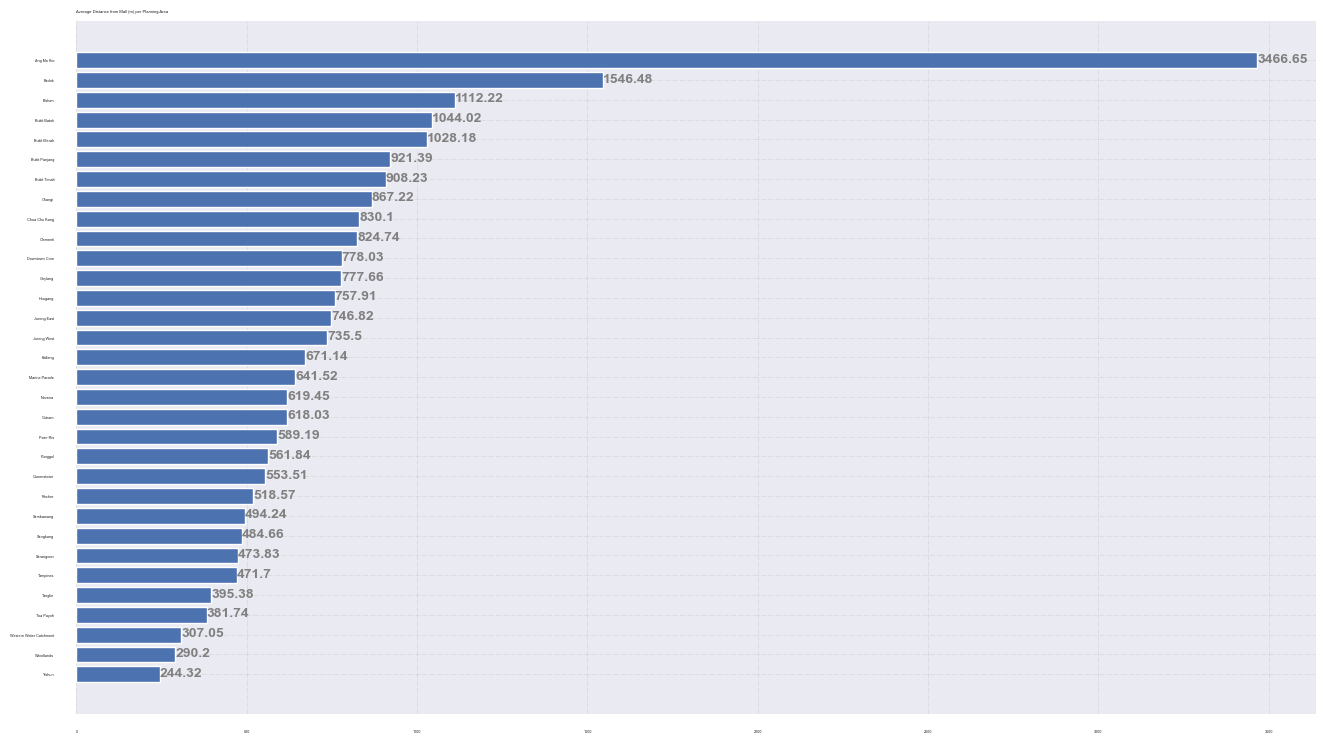

In [51]:
# Plot barplot for Average Distance from Mall (km) per Planning Area
p_area = mall_region['planning_area']
r_price = mall_region['mall_nearest_distance'].sort_values(ascending=False)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(p_area, r_price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Average Distance from Mall (m) per Planning Area',
             loc ='left')
 
# Show Plot
plt.show()

Comment: Recommended for buyers who prefer to live near malls (for the convenience) to look into resale flats at Tanglin, Toa Payoh, Wastern Water Catchment, Woodlands, Yishun. 

In [52]:
# Barplot for Average Distance from Hawker (km) per Planning Area
hawker_region = hdb_train.groupby(hdb_train['planning_area'])[['hawker_nearest_distance']].mean().reset_index()

In [53]:
hawker_region

planning_area  hawker_nearest_distance
0                Ang Mo Kio               312.043636
1                     Bedok               409.880181
2                    Bishan               769.043550
3               Bukit Batok              1878.274489
4               Bukit Merah               299.735198
5             Bukit Panjang               957.702851
6               Bukit Timah               272.440647
7                    Changi               156.048872
8             Choa Chu Kang              3290.470342
9                  Clementi               438.102441
10            Downtown Core               523.859795
11                  Geylang               346.926022
12                  Hougang               832.063274
13              Jurong East               521.782365
14              Jurong West              1161.432727
15                  Kallang               312.223086
16            Marine Parade               324.819252
17                   Novena               436.826613
18                   Outram               162.646658
19                Pasir Ris              1121.868050
20                  Punggol              3974.679469
21               Queenstown               398.234118
22                   Rochor               233.329783
23                Sembawang              2150.096458
24                 Sengkang              2290.923891
25                Serangoon              1107.001928
26                 Tampines              1019.599025
27                  Tanglin               231.252515
28                Toa Payoh               424.336133
29  Western Water Catchment              3941.263312
30                Woodlands               719.695590
31                   Yishun               775.856521

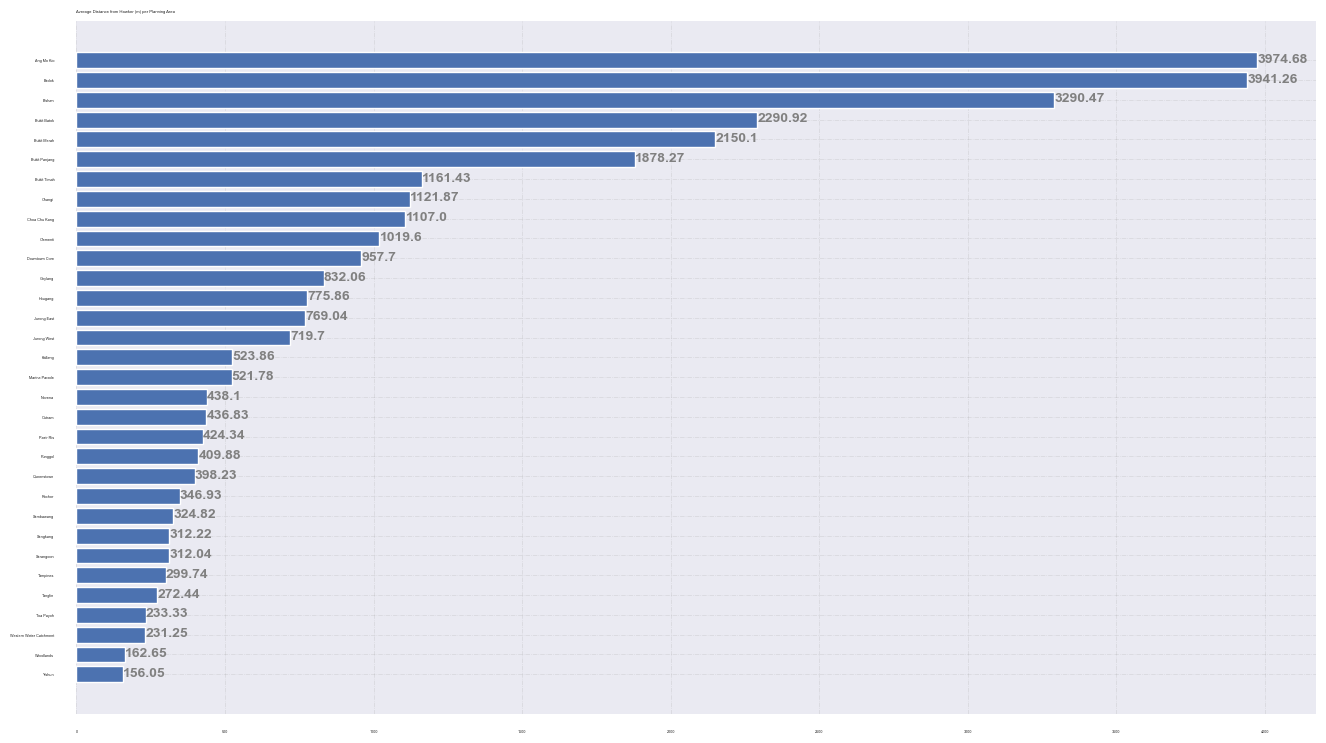

In [54]:
# Plot barplot for Average Distance from Hawker (km) per Planning Area
p_area = hawker_region['planning_area']
r_price = hawker_region['hawker_nearest_distance'].sort_values(ascending=False)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(p_area, r_price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Average Distance from Hawker (m) per Planning Area',
             loc ='left')
 
# Show Plot
plt.show()

Comment: Recommended for buyers who prefer to live near hawkers (for the accessibility) to look into resale flats at Tanglin, Toa Payoh, Wastern Water Catchment, Woodlands, Yishun. 

In [55]:
# Barplot for Average Distance from MRT (km) per Planning Area
mrt_region = hdb_train.groupby(hdb_train['planning_area'])[['mrt_nearest_distance']].mean().reset_index()

In [56]:
mrt_region

planning_area  mrt_nearest_distance
0                Ang Mo Kio            767.768173
1                     Bedok            610.675587
2                    Bishan            831.820832
3               Bukit Batok            649.913335
4               Bukit Merah            614.478926
5             Bukit Panjang            955.818873
6               Bukit Timah            368.534001
7                    Changi           3513.965408
8             Choa Chu Kang            721.472407
9                  Clementi            752.610186
10            Downtown Core            336.670023
11                  Geylang            456.661603
12                  Hougang            903.796120
13              Jurong East            887.827616
14              Jurong West            800.854214
15                  Kallang            374.924827
16            Marine Parade           1891.289303
17                   Novena            908.816677
18                   Outram            482.842803
19                Pasir Ris           1080.727785
20                  Punggol            937.119849
21               Queenstown            453.552949
22                   Rochor            239.455793
23                Sembawang            564.877320
24                 Sengkang           1058.054107
25                Serangoon           1081.035233
26                 Tampines            626.320465
27                  Tanglin             77.357266
28                Toa Payoh            606.171501
29  Western Water Catchment            458.516384
30                Woodlands            628.641995
31                   Yishun            822.845378

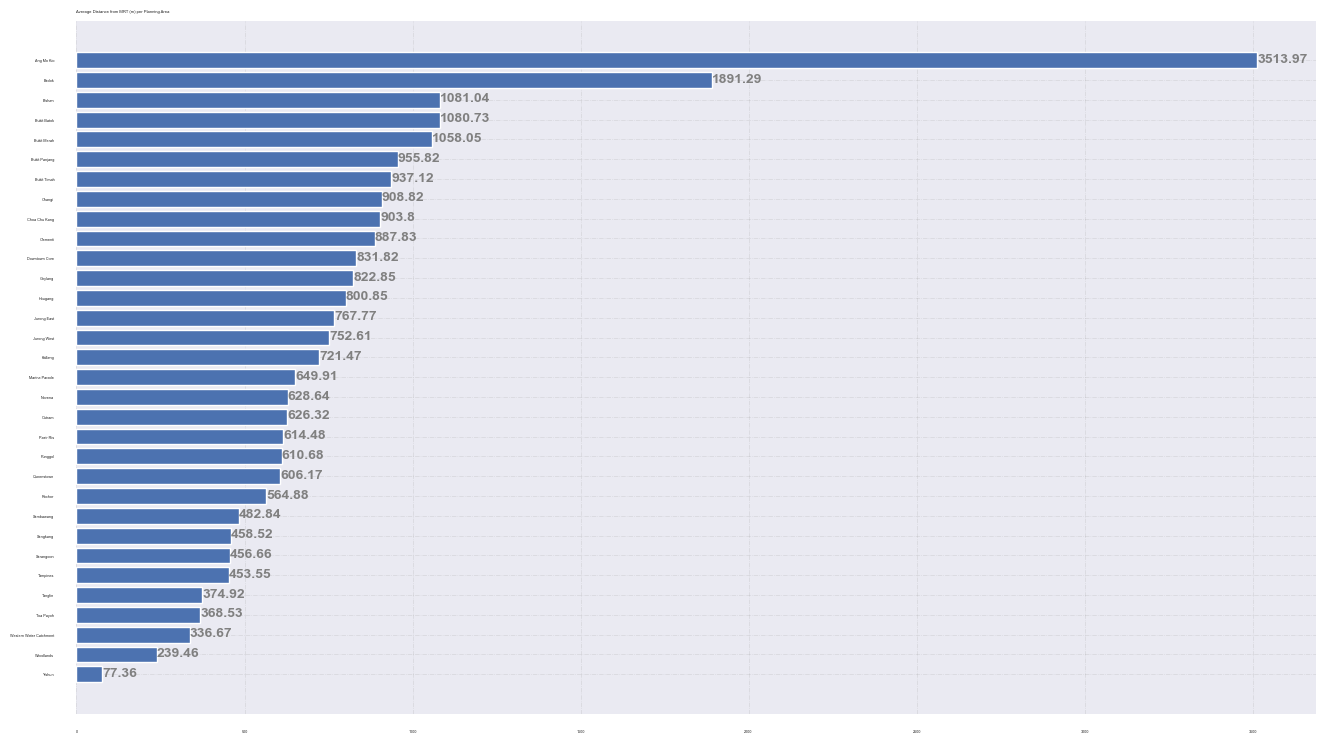

In [57]:
# Plot barplot for Average Distance from MRT (km) per Planning Area
p_area = mrt_region['planning_area']
r_price = mrt_region['mrt_nearest_distance'].sort_values(ascending=False)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(p_area, r_price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Average Distance from MRT (m) per Planning Area',
             loc ='left')
 
# Show Plot
plt.show()

Comment: Recommended for buyers who prefer to live near a transport node (for the connectivity) to look into resale flats at Tanglin, Toa Payoh, Wastern Water Catchment, Woodlands, Yishun. 

In [58]:
# Barplot for Average Distance from Bus Stop (km) per Planning Area
bus_stop_region = hdb_train.groupby(hdb_train['planning_area'])[['bus_stop_nearest_distance']].mean().reset_index()

In [59]:
bus_stop_region

planning_area  bus_stop_nearest_distance
0                Ang Mo Kio                 120.706296
1                     Bedok                 134.496455
2                    Bishan                 132.632135
3               Bukit Batok                 113.398818
4               Bukit Merah                 113.894912
5             Bukit Panjang                 106.348541
6               Bukit Timah                 148.178525
7                    Changi                  53.396541
8             Choa Chu Kang                 104.995285
9                  Clementi                 119.141802
10            Downtown Core                  49.992911
11                  Geylang                 145.006737
12                  Hougang                 106.106576
13              Jurong East                 116.011540
14              Jurong West                 106.767995
15                  Kallang                 121.572161
16            Marine Parade                 132.925807
17                   Novena                 104.574734
18                   Outram                  82.876593
19                Pasir Ris                 113.202536
20                  Punggol                 119.937352
21               Queenstown                 118.806215
22                   Rochor                 116.130203
23                Sembawang                 106.884555
24                 Sengkang                 117.907532
25                Serangoon                 109.002431
26                 Tampines                 110.061008
27                  Tanglin                  76.103940
28                Toa Payoh                 114.430505
29  Western Water Catchment                 268.886903
30                Woodlands                 107.897644
31                   Yishun                 116.844303

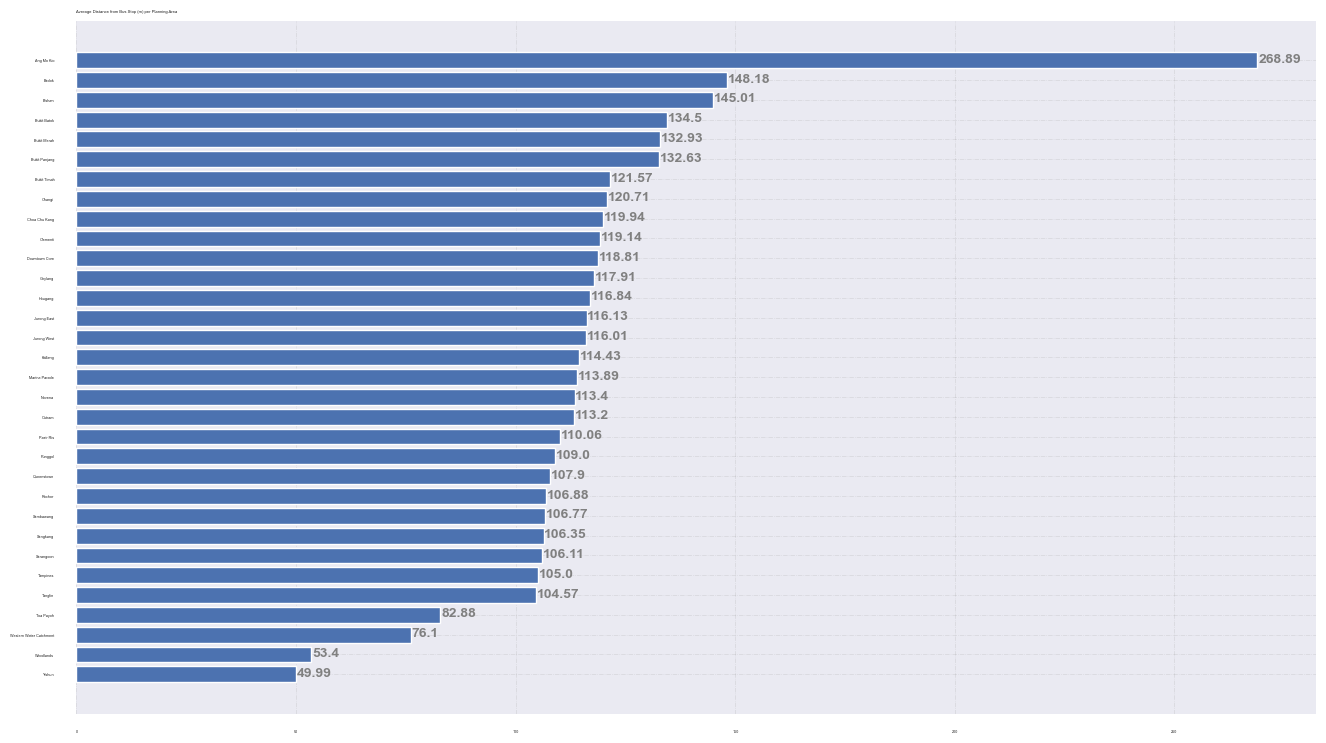

In [60]:
# Plot barplot for Average Distance from Bus Stop (km) per Planning Area
p_area = bus_stop_region['planning_area']
r_price = bus_stop_region['bus_stop_nearest_distance'].sort_values(ascending=False)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(p_area, r_price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Average Distance from Bus Stop (m) per Planning Area',
             loc ='left')
 
# Show Plot
plt.show()

Comment: Recommended for buyers looking to peace and quiet to reside in areas where the average distance from bus stops are the furthest e.g., Ang Mo Kio, Bedok, Bishan, Bukit Batok, Bukit Merah. This would also boost the potential resale prices of their units as the further you are located from the bus stop, the higher the resale price of your unit. 

In [61]:
# Barplot for Average Distance from Primary School (km) per Planning Area
pri_sch_region = hdb_train.groupby(hdb_train['planning_area'])[['pri_sch_nearest_distance']].mean().reset_index()

In [62]:
pri_sch_region

planning_area  pri_sch_nearest_distance
0                Ang Mo Kio                426.928808
1                     Bedok                428.003108
2                    Bishan                391.109748
3               Bukit Batok                382.659727
4               Bukit Merah                397.501584
5             Bukit Panjang                352.263890
6               Bukit Timah                372.383300
7                    Changi               3261.816795
8             Choa Chu Kang                348.910488
9                  Clementi                614.981649
10            Downtown Core                827.801489
11                  Geylang                489.387190
12                  Hougang                331.652394
13              Jurong East                670.135849
14              Jurong West                420.690081
15                  Kallang                534.458458
16            Marine Parade                252.808688
17                   Novena                514.523068
18                   Outram                492.409817
19                Pasir Ris                346.800782
20                  Punggol                257.441169
21               Queenstown                637.880641
22                   Rochor                526.214892
23                Sembawang                247.459938
24                 Sengkang                284.512947
25                Serangoon                481.871958
26                 Tampines                385.651213
27                  Tanglin                487.263972
28                Toa Payoh                381.043039
29  Western Water Catchment                413.723969
30                Woodlands                386.390529
31                   Yishun                349.210855

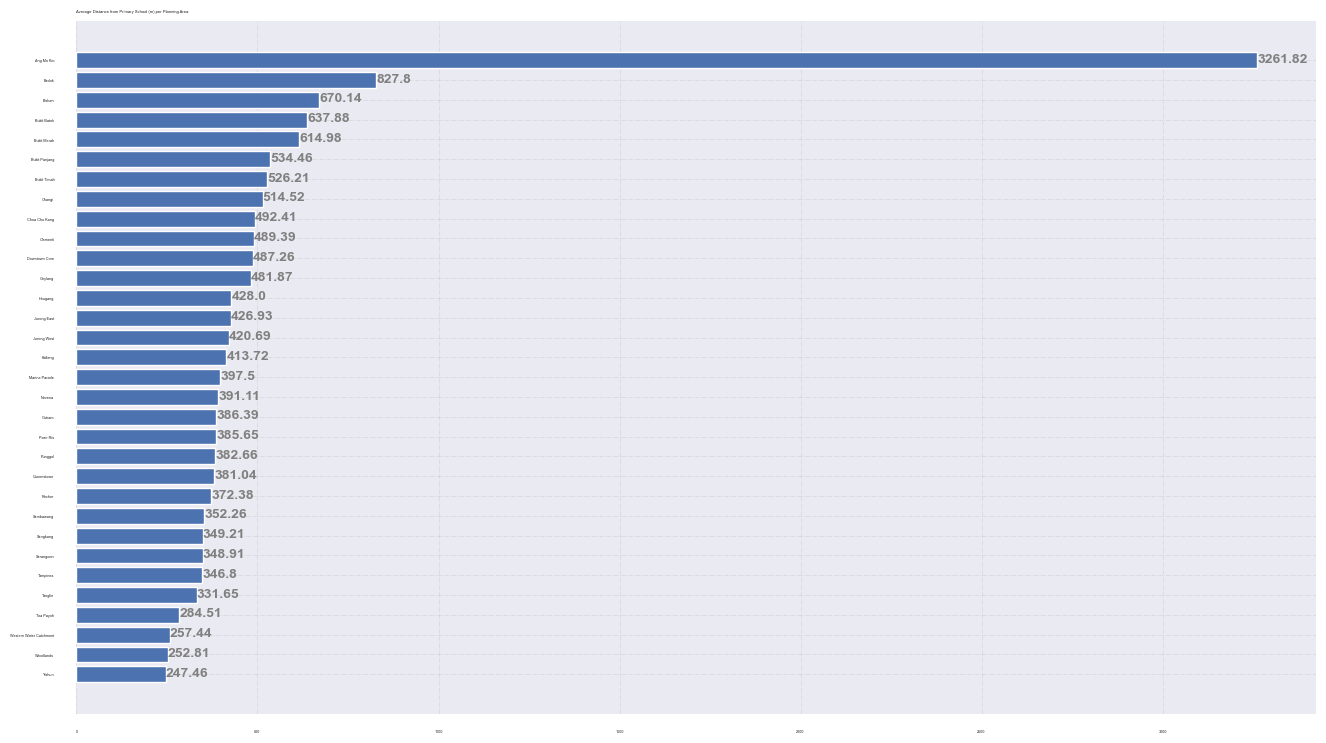

In [63]:
# Plot barplot for Average Distance from Primary School (km) per Planning Area
p_area = pri_sch_region['planning_area']
r_price = pri_sch_region['pri_sch_nearest_distance'].sort_values(ascending=False)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(p_area, r_price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Average Distance from Primary School (m) per Planning Area',
             loc ='left')
 
# Show Plot
plt.show()

Comment: Recommended for buyers who are looking to enrol their children into their preferred primary schools to look into all planning areas (within 1km), except for Ang Mo Kio.

In [64]:
# Barplot for Average Distance from Secondary School (km) per Planning Area
sec_sch_region = hdb_train.groupby(hdb_train['planning_area'])[['sec_sch_nearest_dist']].mean().reset_index()

In [65]:
sec_sch_region

planning_area  sec_sch_nearest_dist
0                Ang Mo Kio            400.408377
1                     Bedok            565.933665
2                    Bishan            414.822186
3               Bukit Batok            390.935445
4               Bukit Merah            704.058883
5             Bukit Panjang            479.022174
6               Bukit Timah            995.117162
7                    Changi           3593.426686
8             Choa Chu Kang            485.772779
9                  Clementi            533.025010
10            Downtown Core            644.215419
11                  Geylang            652.595808
12                  Hougang            400.028453
13              Jurong East            752.537604
14              Jurong West            439.432334
15                  Kallang            978.071309
16            Marine Parade            654.298713
17                   Novena            572.336519
18                   Outram           1038.357977
19                Pasir Ris            803.042365
20                  Punggol            428.053307
21               Queenstown            713.529878
22                   Rochor           1220.609793
23                Sembawang            489.349733
24                 Sengkang            420.013813
25                Serangoon            395.020158
26                 Tampines            422.680473
27                  Tanglin            383.815738
28                Toa Payoh            575.175868
29  Western Water Catchment            299.785227
30                Woodlands            430.752347
31                   Yishun            406.790665

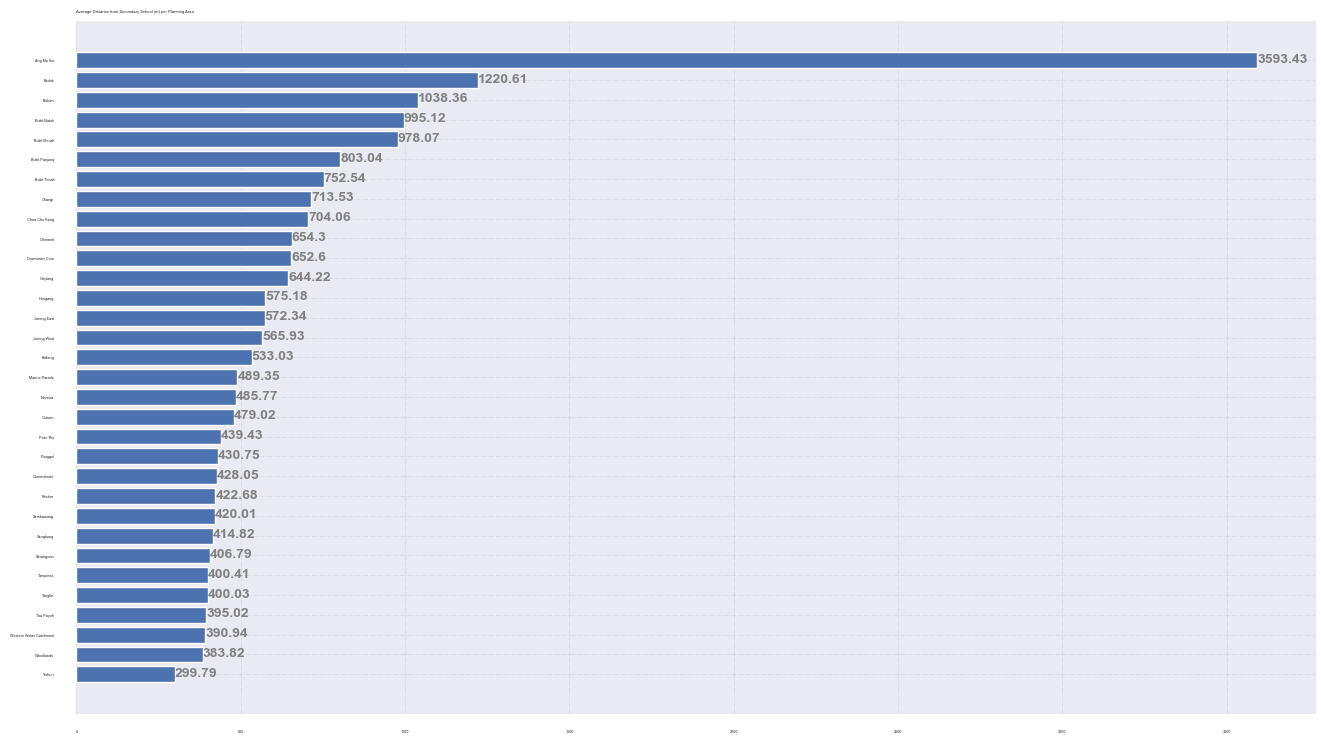

In [66]:
# Plot barplot for Average Distance from Secondary School (km) per Planning Area
p_area = sec_sch_region['planning_area']
r_price = sec_sch_region['sec_sch_nearest_dist'].sort_values(ascending=False)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(p_area, r_price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Average Distance from Secondary School (m) per Planning Area',
             loc ='left')
 
# Show Plot
plt.show()

Comment: Recommended for buyers looking to peace and quiet to reside in areas where the average distance from secondary schools are the furthest e.g., Ang Mo Kio, Bedok, Bishan, Bukit Batok, Bukit Merah. This would also boost the potential resale prices of their units as the further you are located from the bus stop, the higher the resale price of your unit.

### 3.1.8 HDB_Age
Does the Bala Curve hold?

In [67]:
import joypy

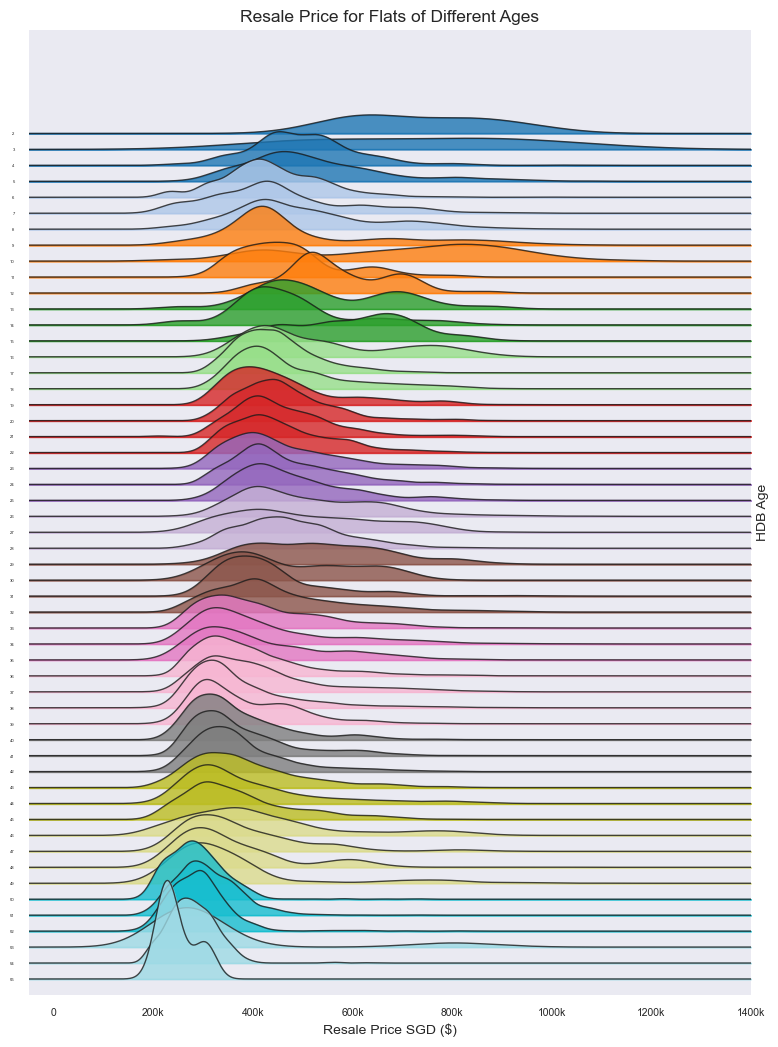

In [68]:
fig, axes = joypy.joyplot(hdb_train, by="hdb_age", column="resale_price",figsize=(7.5,10),
             linewidth=1,overlap=5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',16))

ax = axes[-1]
ax.yaxis.set_label_position("right")
ax.set_ylabel("HDB Age", fontsize=10)
ax.yaxis.set_visible(True)
ax.yaxis.set_ticks([])

plt.title('Resale Price for Flats of Different Ages', fontsize = 12.5)
plt.xlabel('Resale Price SGD ($)', fontsize=10)
ax.set_xlim([-50000,1400000])
ax.set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k', '1400k'], fontsize=7.5);

Comment: In line with the Bala's curve, the higher the age of the HDB, the shorter the remaining lease period, hence the lower the remaining value of the unit. 

### 3.1.9 Lease Commencement Date
The later the lease commencement date, the younger the project. According to the Bala's curve, the younger the project, the longer the remaining lease period. Hence you should expect the value of the units with a more recent lease commencement date to fetch higher resale prices (having depreciate less). 

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gn/T/ipykernel_29121/3053398448.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


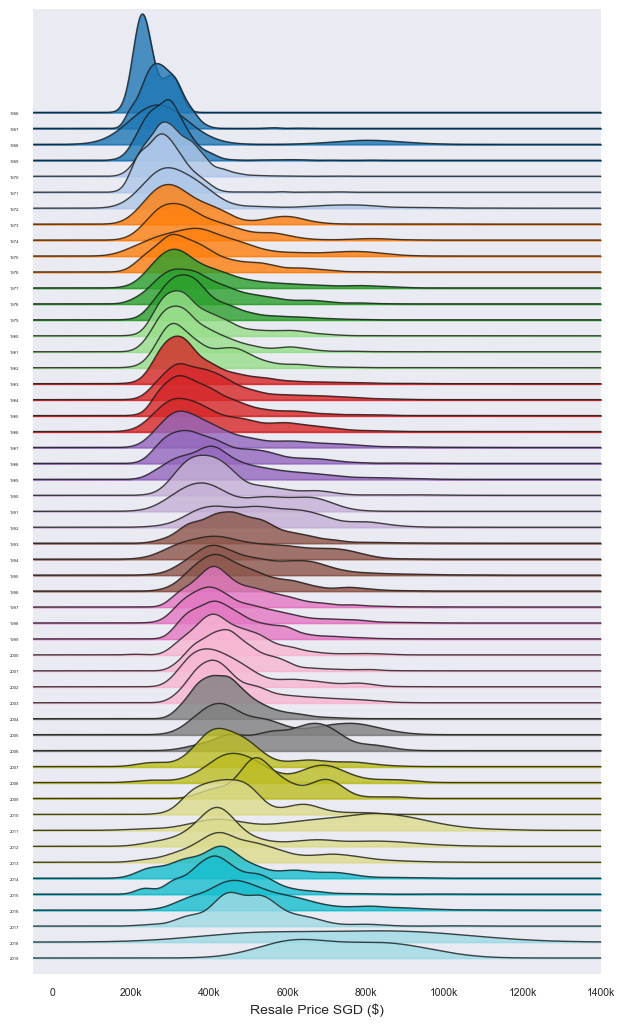

In [69]:
fig, axes = joypy.joyplot(hdb_train, by="lease_commence_date", column="resale_price",figsize=(6,10),
             linewidth=1,overlap=5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',16))
axes[-1].set_xlim([-50000,1400000])
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k', '1400k'], fontsize=7.5) 
plt.xlabel('Resale Price SGD ($)', fontsize=10)
fig.show()

Comment: It is not clear that the projects which are built later are more expensive.  This could be due to government interventions i.e., aggressive cooling measures, especially around the period 2007 to 2019 - to be further explored if time permits. 

---
### EDA #2 : Categorical Variables (Boolean)

*Scatterplot between categorical variable and your target variable.* 

In [70]:
# There are 24 categorical (binary, nominal, ordinal) features
hdb_train_cat = hdb_train.select_dtypes(include = 'category')
len(hdb_train_cat.columns)

24

In [71]:
# Describe the categorical variables
hdb_train_cat.describe()

id         town flat_type   block     street_name storey_range  \
count   150634       150634    150634  150634          150634       150634   
unique  150634           26         7    2514             553           25   
top          1  JURONG WEST    4 ROOM       2  YISHUN RING RD     04 TO 06   
freq         1        11451     61136     579            2451        34699   

       flat_model  full_flat_type              address  residential  ...  \
count      150634          150634               150634       150634  ...   
unique         20              43                 9157            1  ...   
top       Model A  4 ROOM Model A  91, TANGLIN HALT RD            1  ...   
freq        46261           35127                  106       150634  ...   

        postal  planning_area  mrt_name  bus_interchange mrt_interchange  \
count   150634         150634    150634           150634          150634   
unique    9125             32        94                2               2   
top     142091    Jurong West   Punggol                1               0   
freq       106          11451      7671            82301          110863   

       bus_stop_name              pri_sch_name  pri_sch_affiliation  \
count         150634                    150634               150634   
unique          1657                       177                    2   
top          Blk 121  Marsiling Primary School                    0   
freq             774                      2075               133583   

                      sec_sch_name sec_sch_affiliation  
count                       150634              150634  
unique                         134                   2  
top     Bendemeer Secondary School                   0  
freq                          3384              145832  

[4 rows x 24 columns]

In [72]:
# Split the categorical features into boolean, nominal, ordinal

hdb_train_boolean = ['residential', 'pri_sch_affiliation', 'sec_sch_affiliation', 
                     'commercial', 'market_hawker', 'multistorey_carpark', 
                     'precinct_pavilion', 'mrt_interchange', 'bus_interchange'] #count:9

hdb_train_nominal = ['id', 'town', 'block', 'street_name', 'flat_model', 'full_flat_type', 
                     'address', 'postal', 'planning_area', 'mrt_name', 'bus_stop_name',
                     'pri_sch_name', 'sec_sch_name'] #count:13

hdb_train_ordinal = ['storey_range', 'flat_type'] #count:2

Plot scatterplots between categorical (boolean) features and the continuous target variable to get a preliminary insight as to whether there are differences in the response variable across categories.

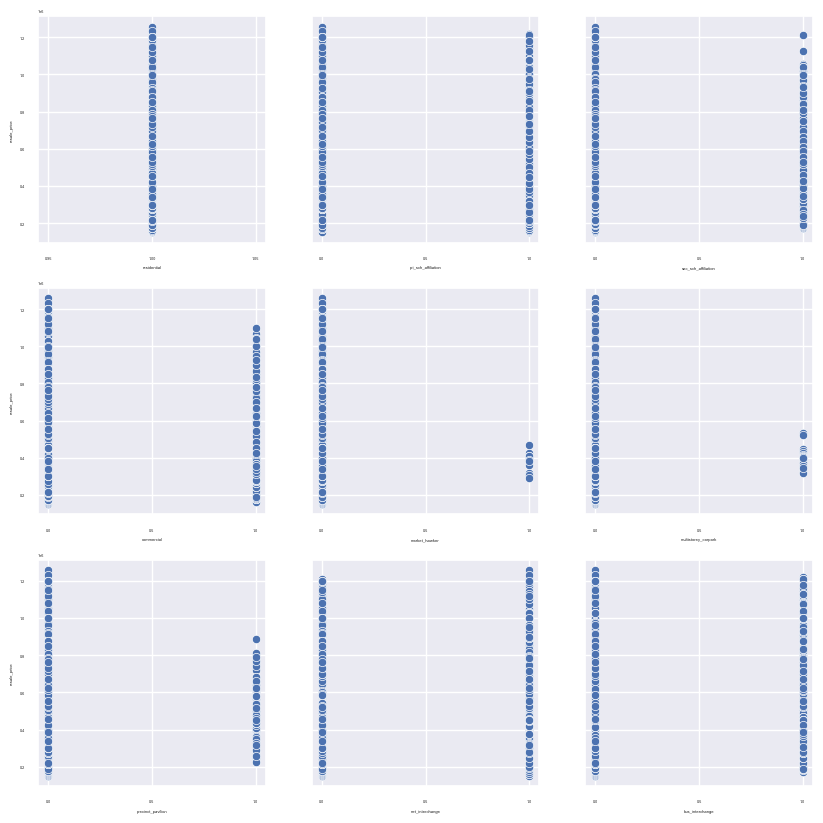

In [73]:
# Assign boolean variables to X
fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=True)
plt.rcParams["axes.labelsize"] = 25
sns.set(style='whitegrid')
j=1

for i in hdb_train_boolean:
    axj = plt.subplot(3,3,j)
    sns.scatterplot(x=i,
                  y="resale_price",
                  data= hdb_train,
                  ax=axj)
    j+=1

Comment: 
- From the graphs, `residential` only has one category, has it has no predictive value - to be removed from the model. 
- A substantial number of the boolean variables are biased (i.e., way more '0's than '1's, vice versa) - to be verified later using value_counts(). Training the model on features that are not evenly distributed could pose an issue later on. Even if they seem to produce results which are highly skewed, you do not know for certain if it is due to biased sampling or if it is a real difference attributed to categorical difference. To be safe, you might not wish to include these variables in your modelling process. 

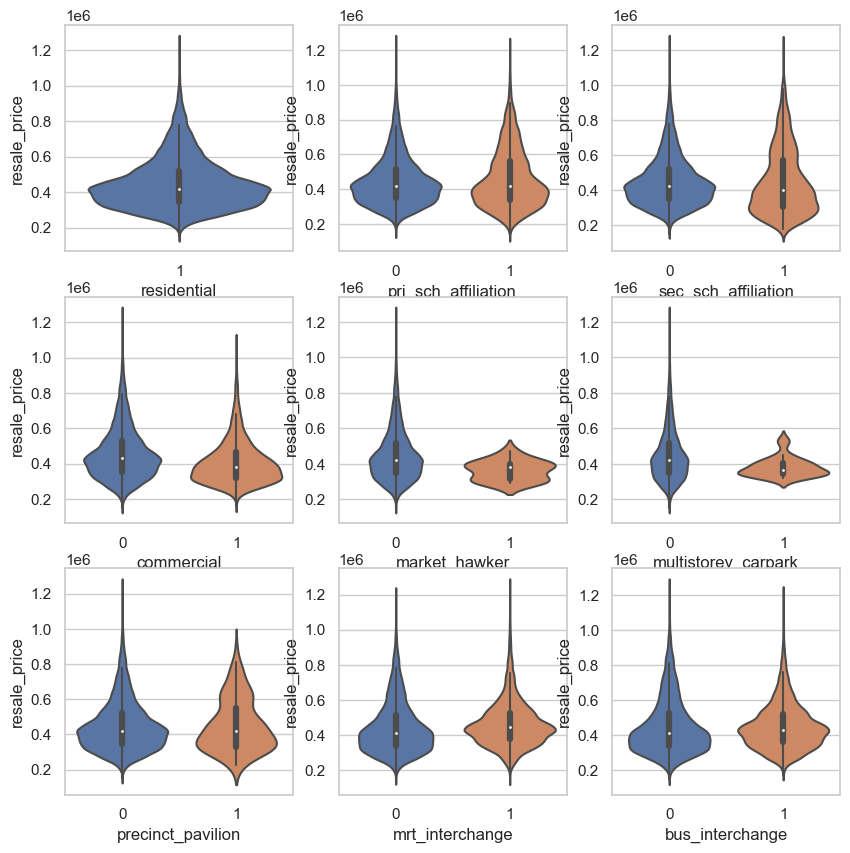

In [74]:
# Assign boolean variables to X
fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=False)
j=1

for i in hdb_train_boolean: 
    axj = plt.subplot(3,3,j)
    sns.violinplot(x=i, y='resale_price', data=hdb_train, ax = axj)
    j+=1

Comment: Builing on the previous scatterplots, the violin plots helps visualize the relationships between each boolean variable and the continuous target variable. The violin plot gives you additional information regarding the distribution of the scatterplots. 

---
### EDA #3 : Categorical Variables (Nominal, Ordinal)

In [75]:
# Flat Type
hdb_train.flat_type.value_counts()

4 ROOM              61136
3 ROOM              39060
5 ROOM              36415
EXECUTIVE           11989
2 ROOM               1896
1 ROOM                 82
MULTI-GENERATION       56
Name: flat_type, dtype: int64

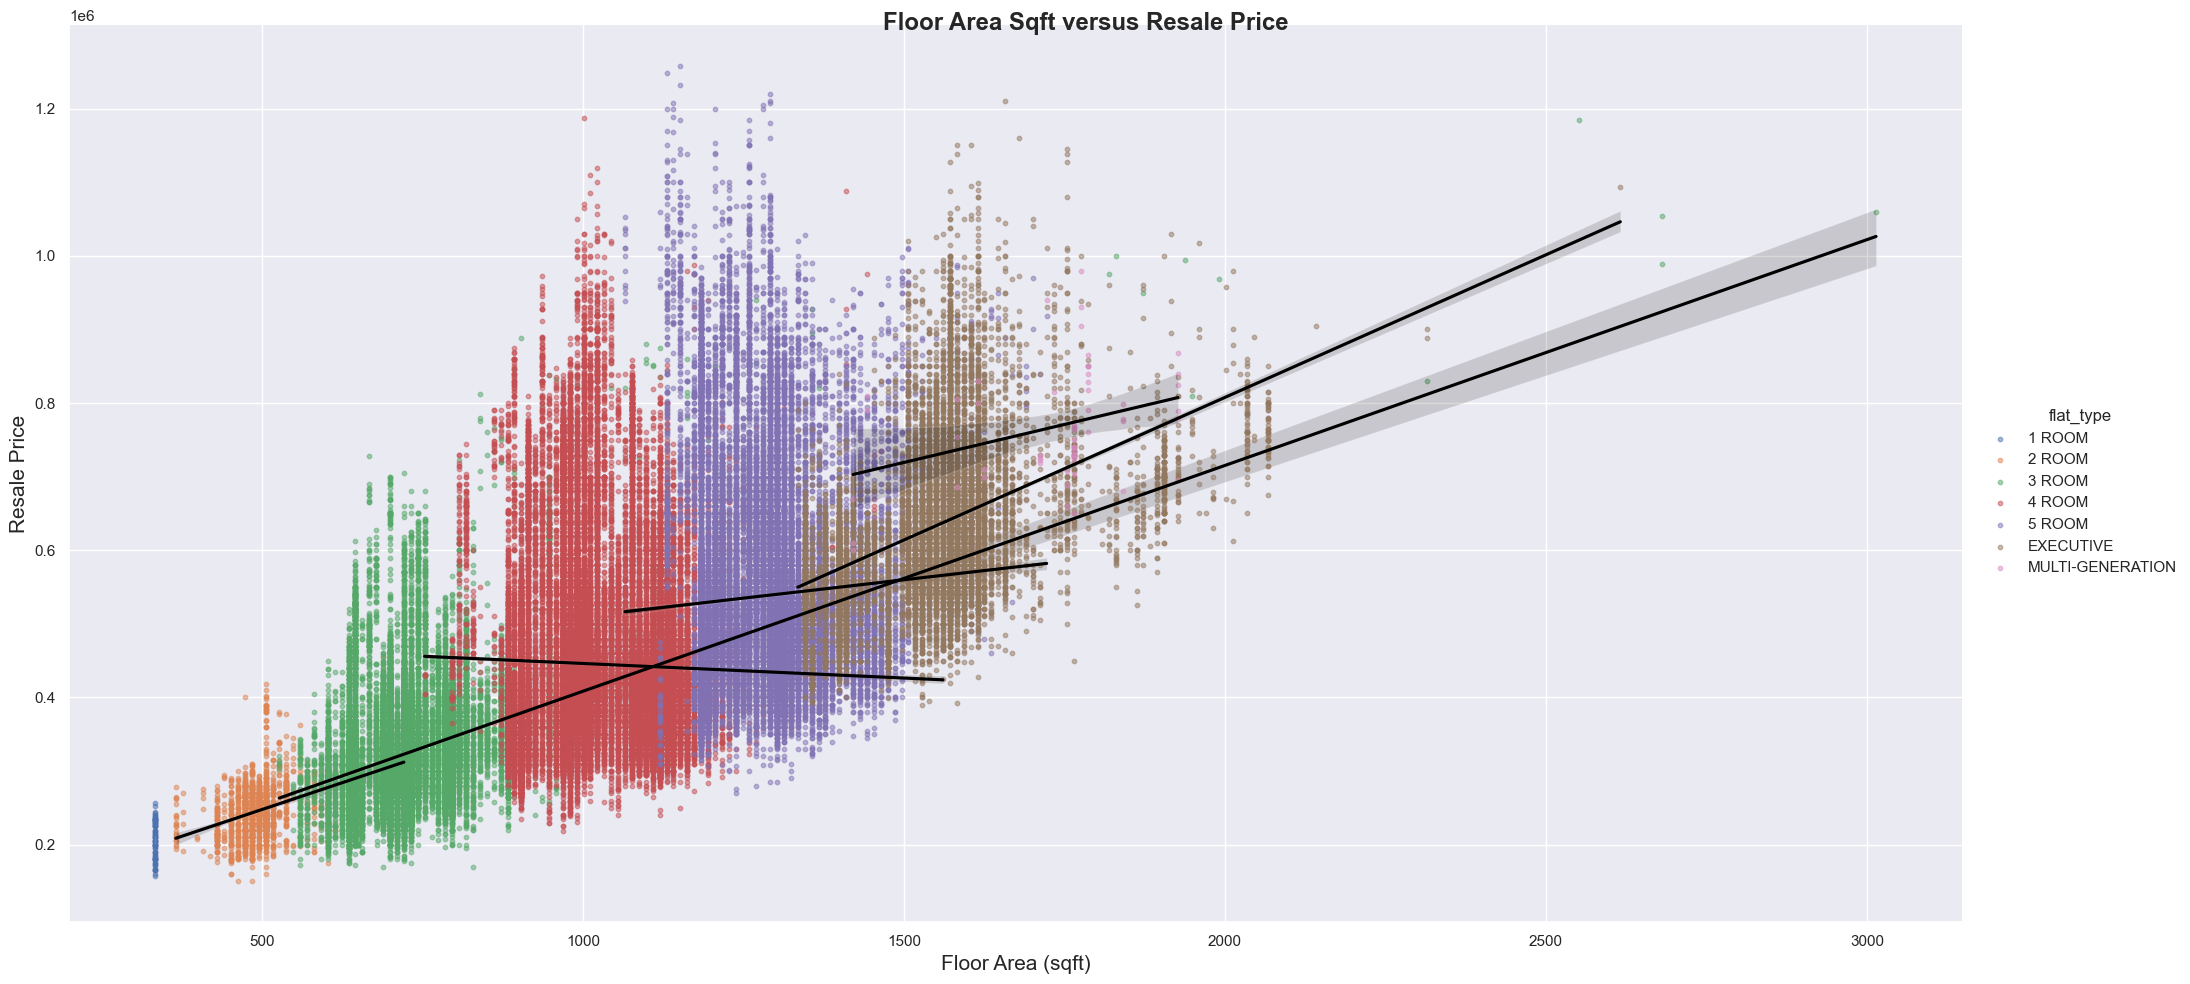

In [76]:
# Set figure size
sns.set( rc = {'figure.figsize' : ( 20, 20 ), 
               'axes.labelsize' : 15 })

# Create Scatterplot with Regression Line
g = sns.lmplot(x="floor_area_sqft", y="resale_price", hue="flat_type", 
           data=hdb_train, height=10, aspect=2, 
           scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color':'black'})

# Title for the complete figure
g.fig.suptitle("Floor Area Sqft versus Resale Price" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )
    
# Set x-axis and y-axis labels
g.set_axis_labels( "Floor Area (sqft)" , "Resale Price" )

# Display figure
plt.show();

Comment: It is aligned with common sense for `resale_price` to increase with `floor_area_sqft`. The linear regression line for 4room flat types stands out because for this particular flat type, the larger the `floor_area_sqft`, the lower the `resale_price`. 

In [77]:
# Storey Range
hdb_train.storey_range.value_counts()

04 TO 06    34699
07 TO 09    31119
01 TO 03    27592
10 TO 12    27189
13 TO 15    12553
16 TO 18     5549
19 TO 21     2387
01 TO 05     2168
06 TO 10     1985
22 TO 24     1695
11 TO 15     1008
25 TO 27      912
28 TO 30      566
31 TO 33      247
34 TO 36      246
37 TO 39      226
16 TO 20      212
40 TO 42      108
21 TO 25       82
26 TO 30       29
46 TO 48       24
43 TO 45       21
49 TO 51       10
36 TO 40        5
31 TO 35        2
Name: storey_range, dtype: int64

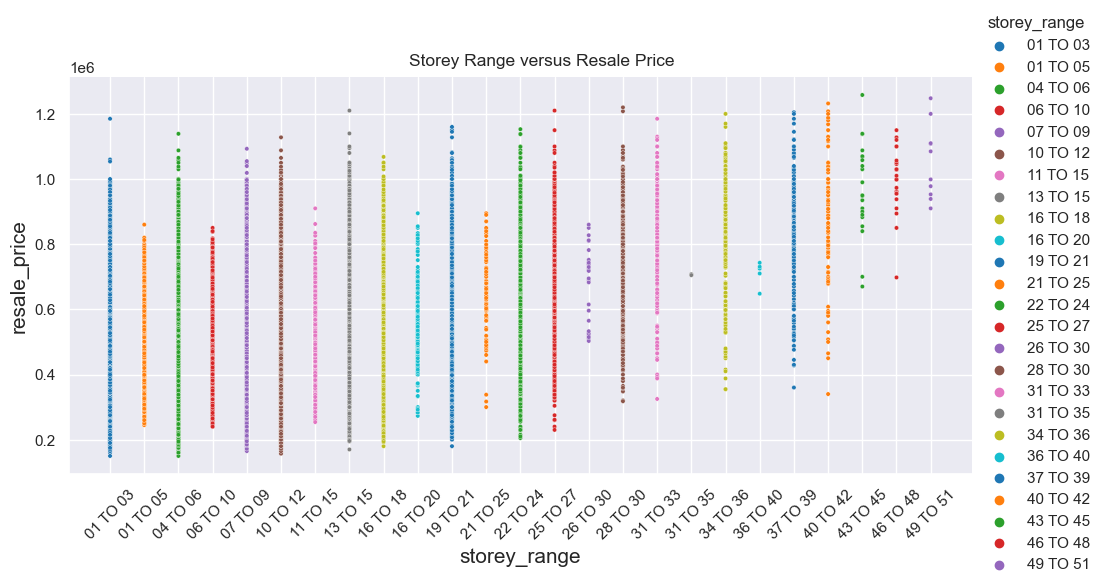

In [78]:
# Create a relational plot to visualise relationship between storey range and resale price
# Ordinal categorical variable because there is an obvious trend line (regression line) 
g = sns.relplot(x='storey_range', y="resale_price", hue ='storey_range', data=hdb_train, height = 5, aspect = 2, s = 10, palette='tab10')
g.fig.suptitle("Storey Range versus Resale Price", fontsize=12.5)
plt.xticks(rotation=45);

Comment: Units on higher storeys typically command higher prices.

In [79]:
# Flat Model
hdb_train.flat_model.value_counts()

Model A                   46261
Improved                  38514
New Generation            23366
Premium Apartment         15091
Simplified                 7239
Apartment                  6080
Standard                   4867
Maisonette                 4364
Model A2                   2064
DBSS                       1658
Model A-Maisonette          262
Adjoined flat               260
Type S1                     242
Type S2                     127
Terrace                      95
Multi Generation             56
Premium Apartment Loft       50
Improved-Maisonette          19
Premium Maisonette           15
2-room                        4
Name: flat_model, dtype: int64

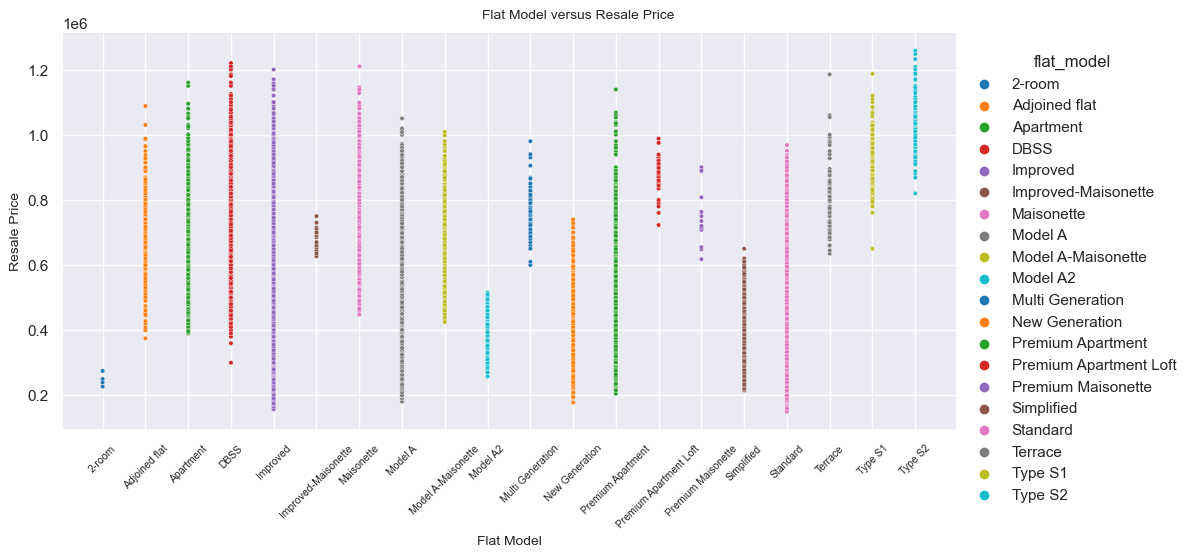

In [80]:
# Create a relational plot to visualise relationship between flat model and resale price 
# Nominal categorical variable because there is no apparent trend
g = sns.relplot(x='flat_model', y="resale_price", hue ='flat_model', data=hdb_train, height = 5, aspect = 2, s = 10, palette='tab10')
g.fig.suptitle("Flat Model versus Resale Price", fontsize=10)
plt.xlabel('Flat Model', fontsize=10)
plt.ylabel('Resale Price', fontsize=10)
plt.xticks(rotation=45, fontsize=7.5);

Comment: Too many categories and no obvious difference in target variable across categories. Consider reclassifying them into a smaller set of categories if the variable is significant. 

In [81]:
# Planning Area
hdb_train.planning_area.value_counts()

Jurong West                11451
Woodlands                  11334
Sengkang                   11069
Tampines                   10506
Yishun                     10042
Bedok                       9062
Punggol                     7793
Hougang                     7557
Ang Mo Kio                  6908
Choa Chu Kang               6328
Bukit Merah                 5854
Bukit Batok                 5700
Bukit Panjang               5686
Toa Payoh                   4817
Pasir Ris                   4725
Queenstown                  4103
Geylang                     3986
Sembawang                   3723
Clementi                    3633
Jurong East                 3470
Kallang                     3163
Serangoon                   3121
Bishan                      2871
Novena                      1091
Marine Parade                943
Outram                       759
Rochor                       468
Bukit Timah                  362
Changi                        38
Downtown Core                 31
Tanglin   

In [82]:
import matplotlib.patches as mpatches

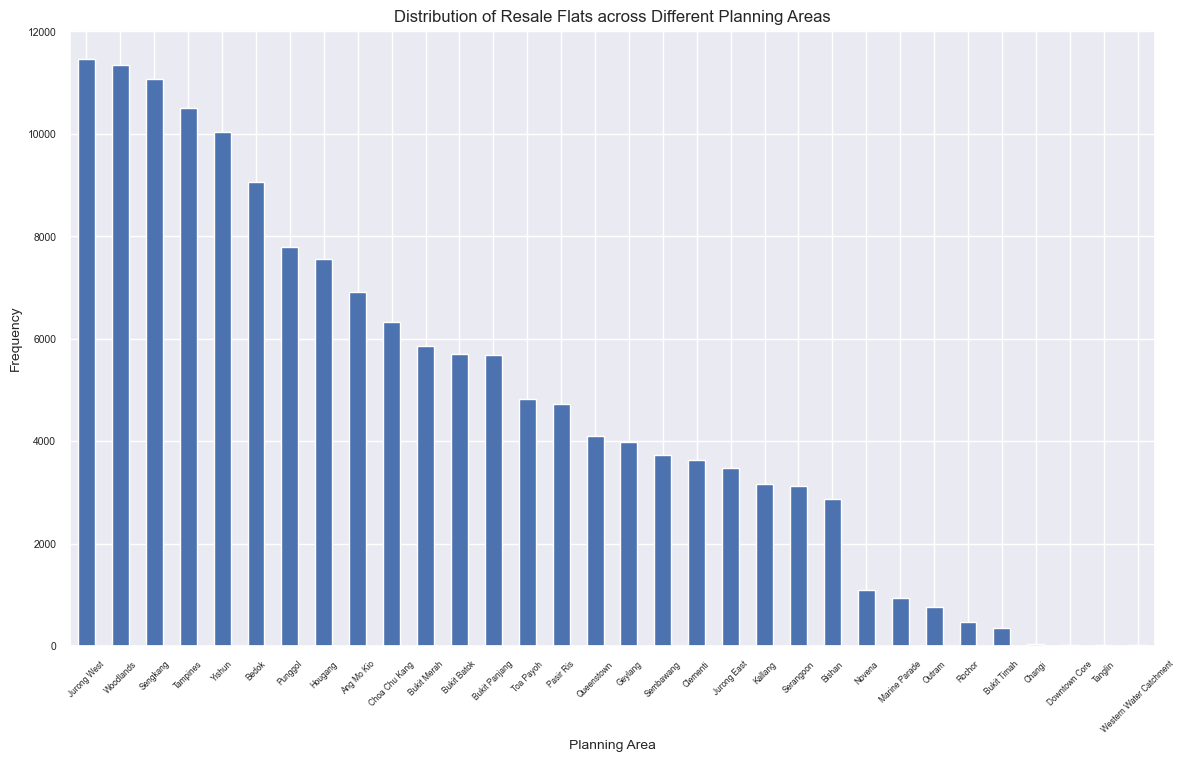

In [83]:
# Establish figsize
fig, ax = plt.subplots(figsize=(10, 10))

# Bar Plot to visualise the number of resale flats in each planning area
ax = hdb_train['planning_area'].value_counts().plot(kind='bar',
                                                    figsize=(14,8), 
                                                    title="Distribution of Resale Flats across Different Planning Areas")
plt.xticks(rotation=45, fontsize=6)
plt.yticks(rotation=0, fontsize=7.5)
ax.set_xlabel("Planning Area", fontsize=10)
ax.set_ylabel("Frequency", fontsize=10);

Comment: You can turn this frequency count barplot into a geospatial heat map to visualise where the high density areas are on the map - 'north', 'east', 'west', 'central', or 'north_east' of Singapore - if time permits. Otherwise, the frequency count barplot is sufficient in telling you that areas such as Jurong West, Woodlands, Sengkang, Tampines, and Yishun are the heartland areas which are most densely populated with HDB units, as expected. 

In [84]:
# Average price of HDB resale flats in the various planning areas
mean_price_area = hdb_train.groupby(hdb_train['town'])[['resale_price']].mean().reset_index()

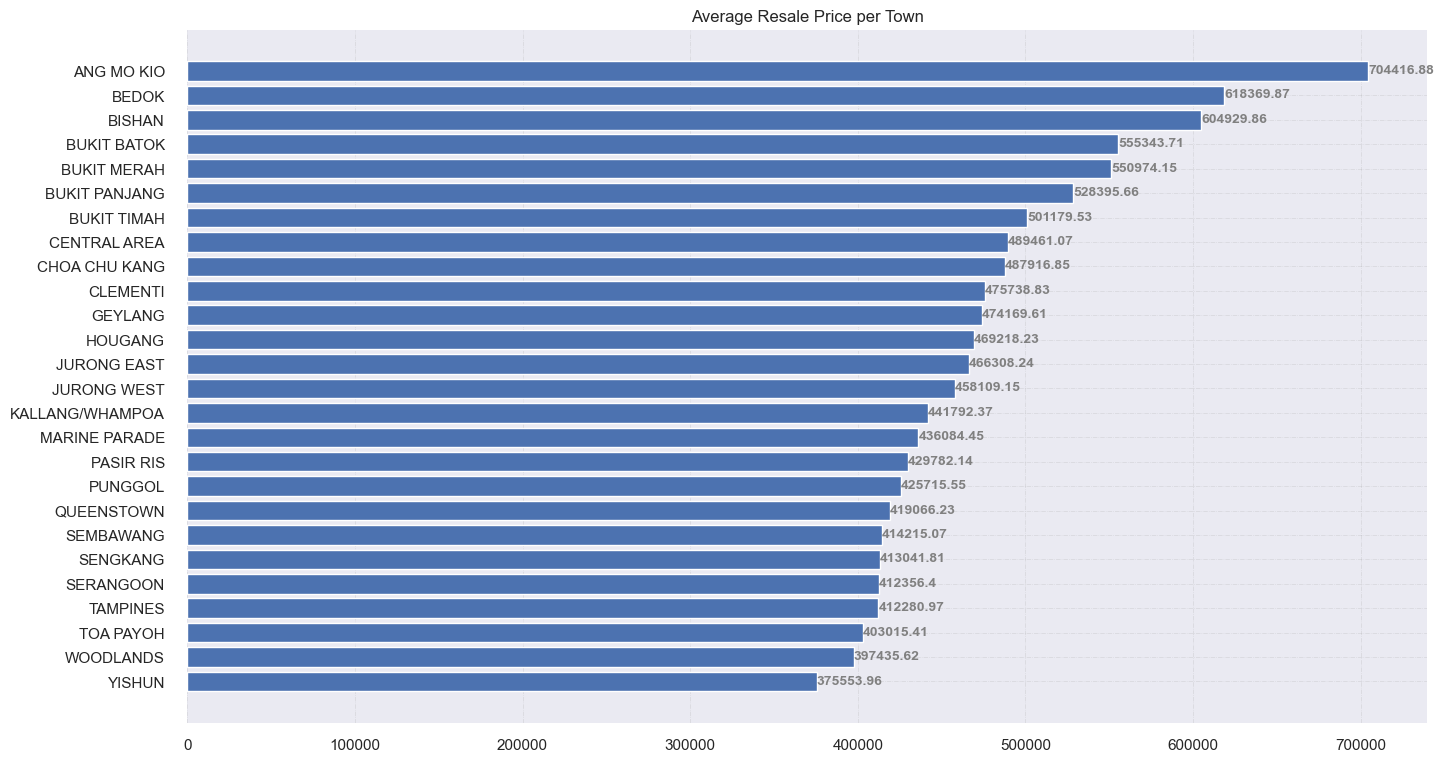

In [85]:
p_area = mean_price_area['town']
r_price = mean_price_area['resale_price'].sort_values(ascending=False)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(p_area, r_price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Average Resale Price per Town',
             loc ='center')
 
# Show Plot
plt.show()

In [86]:
# Average price of HDB resale flats in the various planning areas
mean_price_area = hdb_train.groupby(hdb_train['planning_area'])[['resale_price']].mean().reset_index()

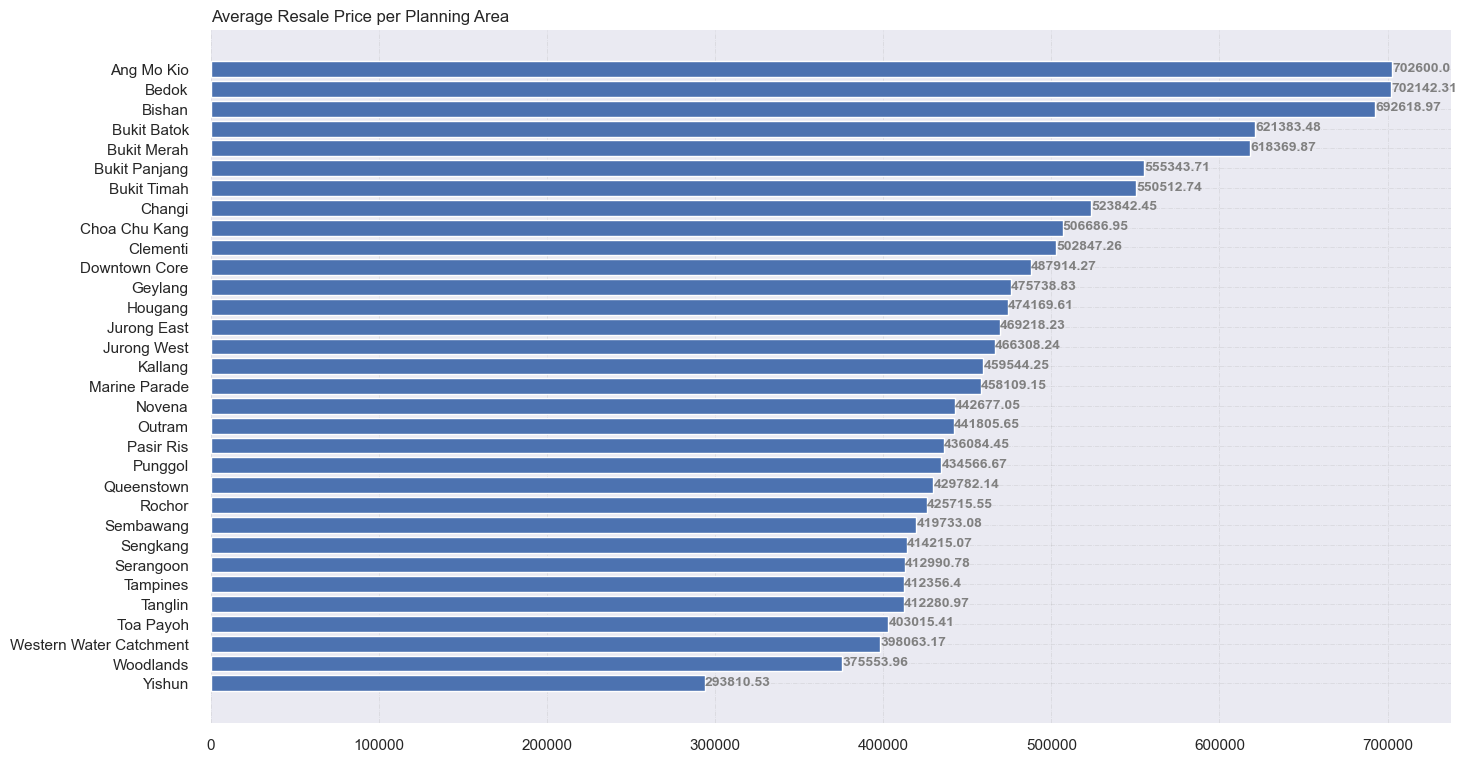

In [87]:
p_area = mean_price_area['planning_area']
r_price = mean_price_area['resale_price'].sort_values(ascending=False)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(p_area, r_price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Average Resale Price per Planning Area',
             loc ='left')
 
# Show Plot
plt.show()

Comment: Units in Ang Mo Kio, Bedok, Bishan, Bukit Batok and Bukit Merah tend to fetch higher than average resale prices (600k and above).

---
### EDA #4 : Time-Series Analysis
Does the 18 year cycle for pricing in private housing market apply to the public housing resale market?

In [88]:
hdb_train['tranc_year'].value_counts()

2020-01-01    18904
2019-01-01    18019
2018-01-01    17536
2017-01-01    16674
2012-01-01    16180
2016-01-01    15624
2015-01-01    14311
2013-01-01    13085
2014-01-01    12985
2021-01-01     7316
Name: tranc_year, dtype: int64

In [89]:
hdb_train['tranc_month'].value_counts()

1900-03-01    14524
1900-07-01    13816
1900-04-01    13559
1900-10-01    13522
1900-08-01    13337
1900-06-01    13072
1900-09-01    12639
1900-11-01    12510
1900-05-01    12036
1900-12-01    11256
1900-01-01    10960
1900-02-01     9403
Name: tranc_month, dtype: int64

In [90]:
# Rectify format of year
hdb_train['tranc_year'] = pd.to_datetime(hdb_train['tranc_year'], format='%Y').apply(lambda x : x.strftime('%Y'))

In [91]:
# Rectify format of month
hdb_train['tranc_month'] = pd.to_datetime(hdb_train['tranc_month'], format='%m').apply(lambda x: x.strftime('%m'))

In [92]:
hdb_train.tranc_year.value_counts()

2020    18904
2019    18019
2018    17536
2017    16674
2012    16180
2016    15624
2015    14311
2013    13085
2014    12985
2021     7316
Name: tranc_year, dtype: int64

In [93]:
hdb_train.tranc_month.value_counts()

03    14524
07    13816
04    13559
10    13522
08    13337
06    13072
09    12639
11    12510
05    12036
12    11256
01    10960
02     9403
Name: tranc_month, dtype: int64

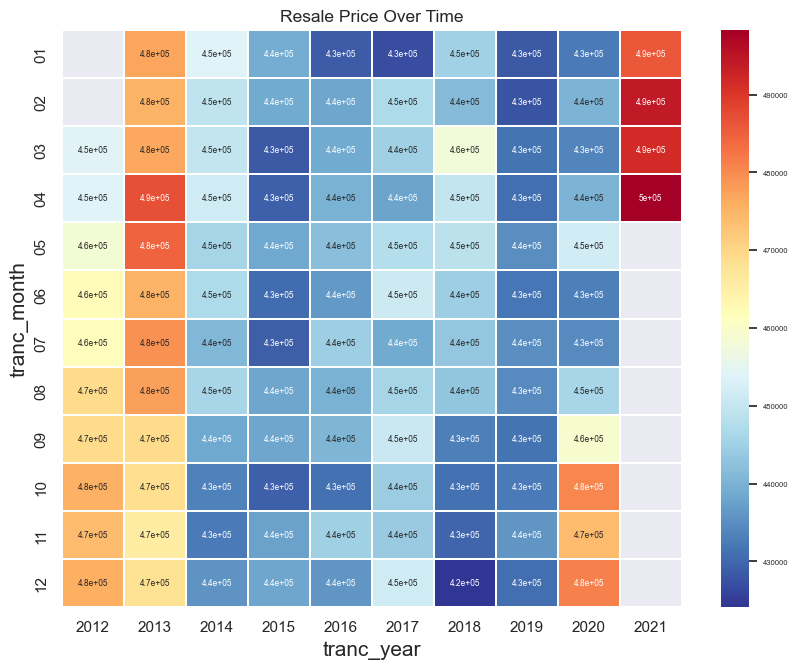

In [94]:
# Establish figure size
plt.subplots(figsize=(10, 7.5))
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Create heatmap using pivot_table
ax1 = plt.subplot(1, 1, 1) 
ax1.set_title('Resale Price Over Time', fontsize=12.5)
pt = hdb_train.pivot_table(index='tranc_month', columns='tranc_year', values='resale_price', aggfunc='mean')
resale_price = pt.reindex(months)
sns.set(font_scale=0.5)
sns.heatmap(resale_price, linewidths = 0.3, annot=True, cmap='RdYlBu_r', ax=ax1);

Comment: There are no apparent trends. Some years stand out in particular, namely 2013 and 2020(Q4) - 2021(Q1) - units fetched higher resale prices. Units transacted in the first and last quarters of the year tend to fetch higher prices. 

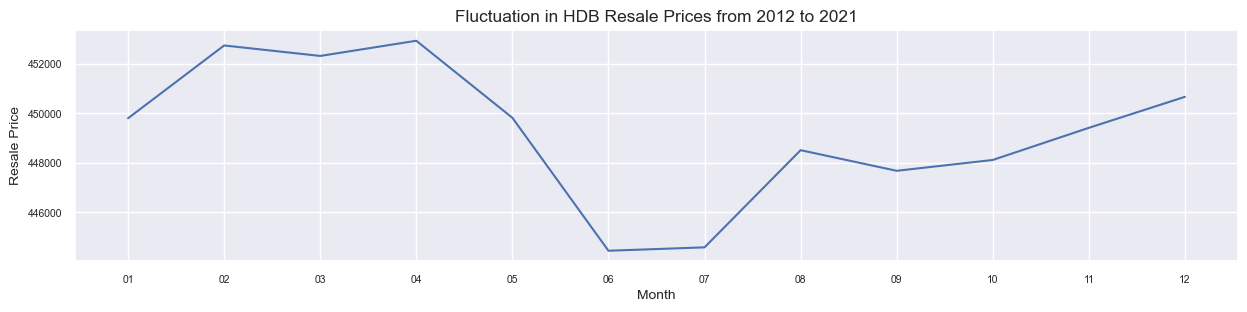

In [95]:
plt.figure(figsize=(15, 3))

x = np.sort(hdb_train['tranc_month'].unique())
y = hdb_train.groupby(hdb_train['tranc_month'])['resale_price'].mean()

plt.plot(x,y)

plt.title(label='Fluctuation in HDB Resale Prices from 2012 to 2021', fontsize=12.5)
plt.xlabel(xlabel='Month', fontsize=10)
plt.xticks(fontsize=7.5)
plt.ylabel(ylabel='Resale Price', fontsize=10)
plt.yticks(fontsize=7.5);

Comment: Line plot corroborates inferences extracted from time series calendar heatmap - units transacted in Q1 and Q4 tend to fetch higher prices. 

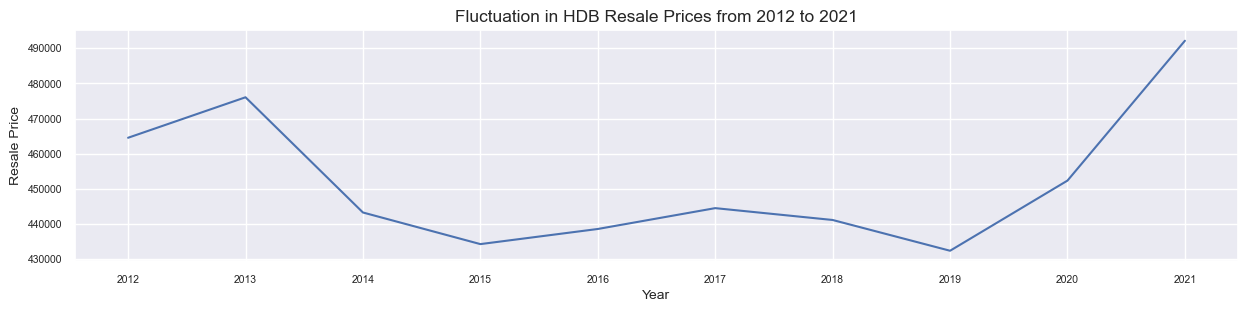

In [96]:
plt.figure(figsize=(15, 3))

x = np.sort(hdb_train['tranc_year'].unique())
y = hdb_train.groupby(hdb_train['tranc_year'])['resale_price'].mean()

plt.plot(x,y)

plt.title(label='Fluctuation in HDB Resale Prices from 2012 to 2021', fontsize=12.5)
plt.xlabel(xlabel='Year', fontsize=10)
plt.xticks(fontsize=7.5)
plt.ylabel(ylabel='Resale Price', fontsize=10)
plt.yticks(fontsize=7.5);

Comment: `tranc_year` covers only 10 years worth of transactions, there is insufficient data to see if the trend line corroborates with the 18-year property cycle.